In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index

from imblearn.over_sampling import SMOTENC

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV


import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from imblearn.pipeline import Pipeline as ImblearnPipeline

from sklearn.preprocessing import FunctionTransformer



from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import hyperparameter_tuning_clasification_smote,validate_model_classification_smote, hyperparameter_tuning_linear_on_preprocessed_dataset, hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_chi2, plot_fancy_tree, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_regression, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = 'data/preprocessed_dataset.csv'
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  height (cm)        BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  hyperandrogenism  hypothyroidism  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  WBC x10^3/ul  neutrophil x10^3/ul  \
967                                                         4                     320.0     NaN                       NaN    79.0        169.0  27.660096                              134.0                                   67.0           0.0                       NaN    NaN                     NaN                    NaN             NaN              NaN                        NaN       NaN                                                       1.0                              0.0                           1.0                                             NaN                                              1.0   NaN        NaN                                                         NaN               1.0             1.0                           5.242176                          6.989568       12.231744                                  NaN                  NaN                     6.42                       9.39                   15.81             1.0          7.13                  NaN   
586                                                         1                     210.0    9.56                 12.719888    58.0        162.0  22.100290                              118.0                                   74.0           0.0                      67.0    0.0                    81.0               0.827160             0.0              1.0                   0.413580       0.0                                                       0.0                              0.0                           0.0                                             1.0                                              1.0   0.0        1.0                                                        11.0               1.0             1.0                           4.400000                          2.940000        7.340000                                  0.0                  1.0                    10.85                      11.01                   21.86             1.0          5.09                 2.72   
670                                                         1                     264.0   24.62                       NaN    63.5        160.0  24.804688                              123.0                                   65.0           0.0                      77.0    0.0                    80.0               0.962500             1.0              1.0                   0.481250       0.0                                                       0.0                              1.0                           0.0                                             1.0                                              1.0   1.0        0.0                                                         0.0               1.0             1.0                           1.953000                          1.440000        3.393000                                  0.0                  1.0                    18.36                       8.26                   26.62             1.0          4.93                 2.60   
817                          

Remove `POF`,  `FHA`, `High Andro` classes

In [3]:
df.loc[(df[PCO] != 0) & (df[PCO] != 1), PCO] = np.nan

CLASS_NAMES = ['healthy', 'PCOS']

In [4]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(742, 135)


<Axes: >

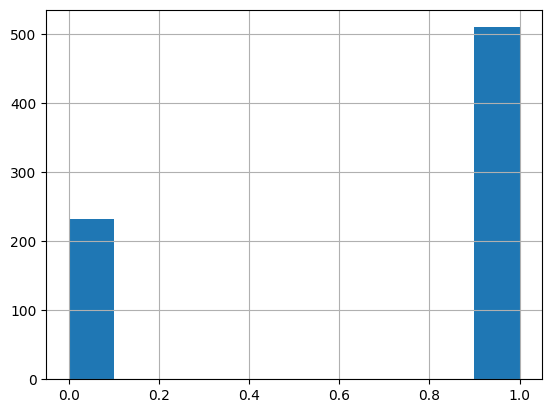

In [5]:
print(df_cleaned.shape)
df_cleaned[PCO].hist()

### Preprocessing

### For SMOTE

In [7]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

### For training without SMOTE

In [31]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

## Hyperparameter tuning

### Decision Tree

In [47]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [3, 4, 5],
    # 'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}
Best score (f1_weighted): 0.7925917562781579


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


params  mean_train_score  mean_test_score
15  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.894761         0.792592
9   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.902010         0.791779
21  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.924528         0.790763
25  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.919061         0.789570
22  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.924662         0.789416
16  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.895081         0.788455
20  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.931673         0.788242
23  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.924683         0.788072
11  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.902190         0.787664
10  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.902190         0.787317
17  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.895081         0.786060
19  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.931689         0.785330
24  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.919196         0.784963
13  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.899338         0.784487
26  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.919061         0.783910
12  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.899202         0.783709
18  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.931689         0.782818
14  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.899202         0.782315
0   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.858188         0.781619
5   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.856764         0.781403
4   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.856764         0.781118
8   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.855616         0.780797
1   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.858188         0.780567
6   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.855616         0.779951
3   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.856764         0.779559
7   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.855616         0.779522
2   {'

In [46]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [6, 7],
    'model__min_samples_leaf': [3, 4, 5],
    # 'class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_clasification_smote(X_train, y_train, PCO, model_tree, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


Best parameters: {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}
Best score (f1_weighted): 0.8171377254697492


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


params  mean_train_score  mean_test_score
9   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.886062         0.817138
10  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.884012         0.816319
7   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.888899         0.815930
11  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.884261         0.815804
6   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.889724         0.813816
8   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.886208         0.812037
1   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.846894         0.809779
0   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.846894         0.809779
3   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.846344         0.808498
2   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.846483         0.807439
5   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.845405         0.807257
4   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.845690         0.805899
17  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.906602         0.803780
16  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.907613         0.802351
12  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.919246         0.800626
15  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.911621         0.800045
13  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.918568         0.799357
14  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.911071         0.798001

In [ ]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Best parameters: {'model__C': 1}
Best score (f1_weighted): 0.8523705193673403


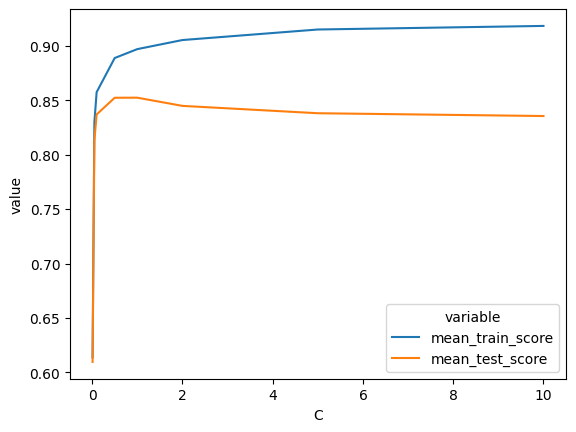

C  mean_train_score  mean_test_score
0  0.01          0.613782         0.609591
1  0.05          0.829612         0.813253
2   0.1          0.857442         0.836952
3   0.5          0.888798         0.852298
4     1          0.896976         0.852371
5     2          0.905327         0.844841
6     5          0.915013         0.838083
7    10          0.918300         0.835518

In [13]:
model_lr = LogisticRegression(max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear_on_preprocessed_dataset(X_train, y_train, PCO, model_lr, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.1

### Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (f1_weighted): 0.7826160815395791


params  mean_train_score  mean_test_score
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.913822         0.782616
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.928839         0.780565
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.948672         0.780479
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.930861         0.778460
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.948119         0.778261
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.929055         0.778234
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.915132         0.777261
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.947720         0.775780
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.912644         0.774311

In [ ]:
model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

### SVM

In [ ]:
model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

param_grid_svc = {
    'model__kernel': ['linear', 'rbf', 'sigmoid'],
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [0.1, 1, 10],
    'model__epsilon': [0.1, 0.2, 0.3],
}

svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

In [42]:
def plot_fancy_tree_smote(pipeline, X_train, y_train, target_name, show_artificial_data=False, class_names=None, is_classification=True):
    preprocessing_pipeline = ImblearnPipeline(steps=pipeline.steps[:-1])

    if show_artificial_data:
        smote_pipeline = ImblearnPipeline(steps=pipeline.steps[:-2])
        _, y_transformed = smote_pipeline.fit_resample(X_train, y_train)
        X_transformed = preprocessing_pipeline.fit_transform(X_train, y_train)
    else:
        new_pipeline = Pipeline(steps=[pipeline.steps[0], pipeline.steps[2]])
        X_transformed = new_pipeline.fit_transform(X_train, y_train)
        y_transformed = y_train
    
    column_names = preprocessing_pipeline.get_feature_names_out()

    if is_classification:
        viz_model = dtreeviz.model(pipeline['model'],
                            X_train=X_transformed,
                            y_train=y_transformed.astype(int),
                            feature_names=column_names,
                            target_name=target_name,
                            class_names=class_names,
                            )
    else:
        viz_model = dtreeviz.model(pipeline['model'],
                    X_train=X_transformed,
                    y_train=y_train,
                    feature_names=column_names,
                    target_name=target_name,
                    )
        
    #  if I wanted to save the tree
    # v = viz_model.view(scale=1.8)
    # v.show()
    # v.save("charts/trees/pco_multiclass_decision_tree.svg")  

    return viz_model.view(scale=1.8)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


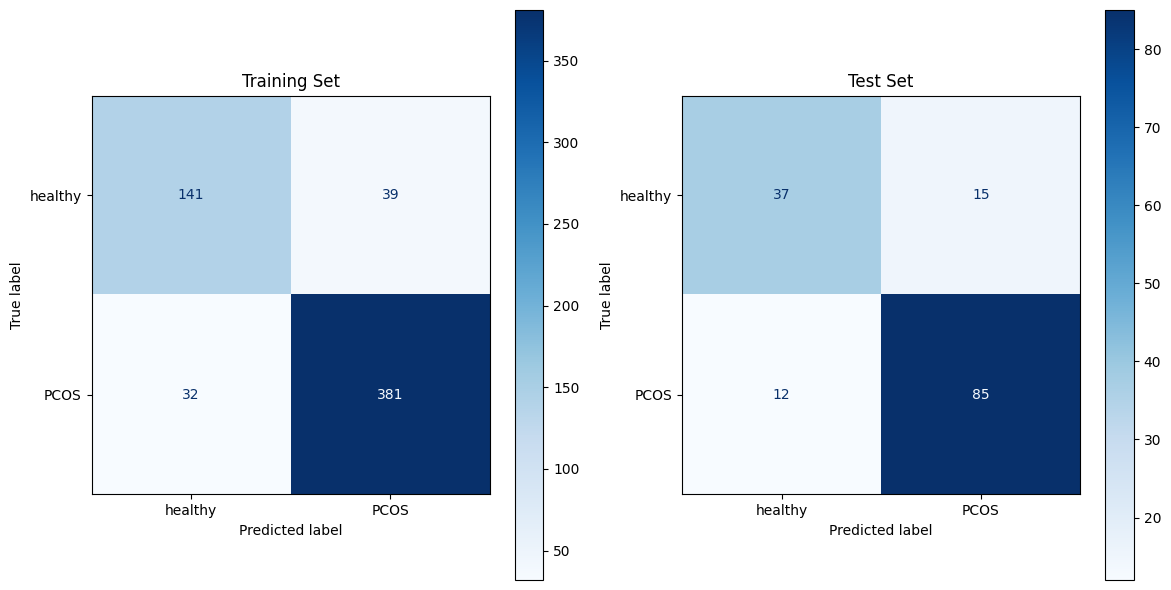

Training set
              precision    recall  f1-score   support

     healthy       0.82      0.78      0.80       180
        PCOS       0.91      0.92      0.91       413

    accuracy                           0.88       593
   macro avg       0.86      0.85      0.86       593
weighted avg       0.88      0.88      0.88       593

Test set
              precision    recall  f1-score   support

     healthy       0.76      0.71      0.73        52
        PCOS       0.85      0.88      0.86        97

    accuracy                           0.82       149
   macro avg       0.80      0.79      0.80       149
weighted avg       0.82      0.82      0.82       149



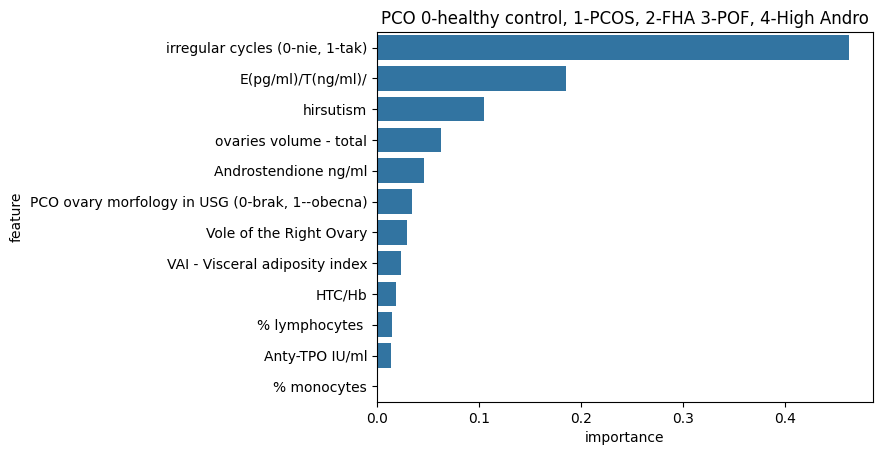

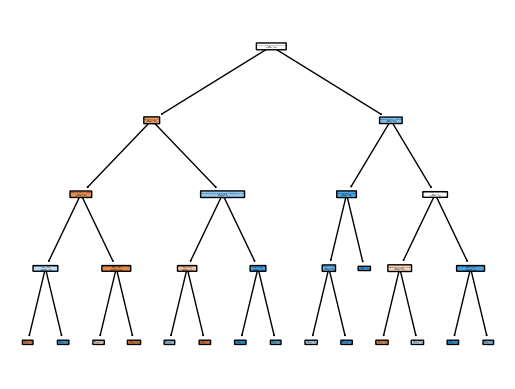

In [48]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

# plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


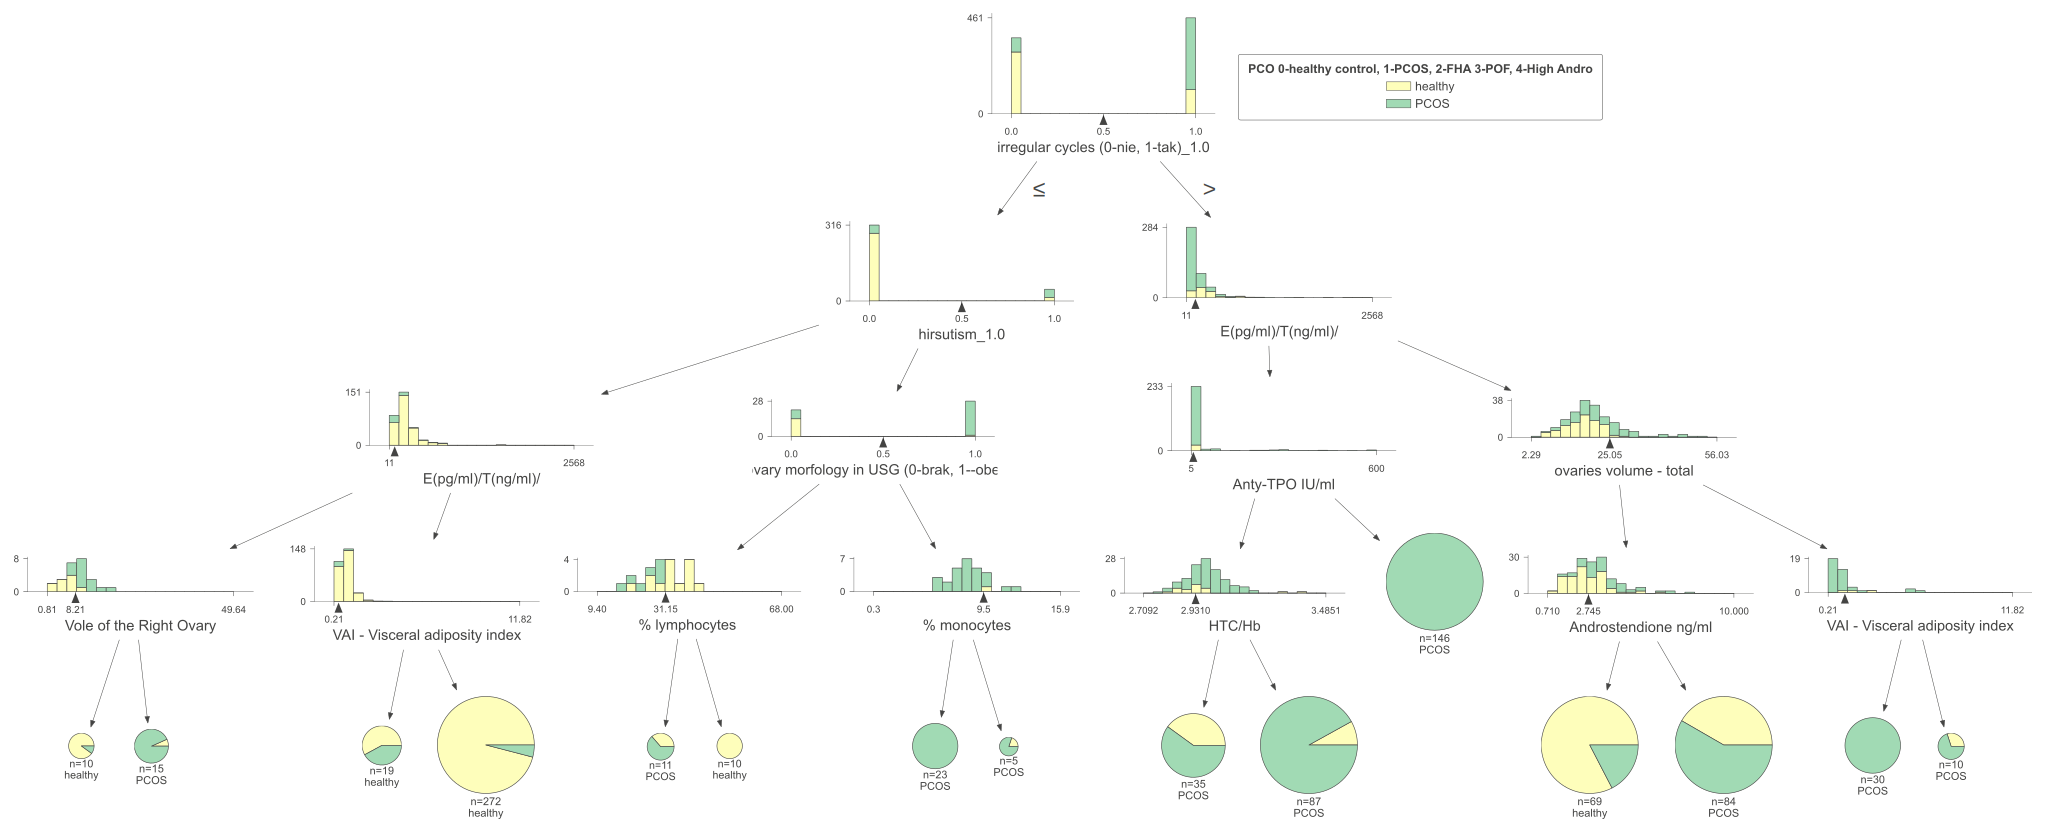

In [49]:
#  SMOTE - tree drawn with also artificial data
plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


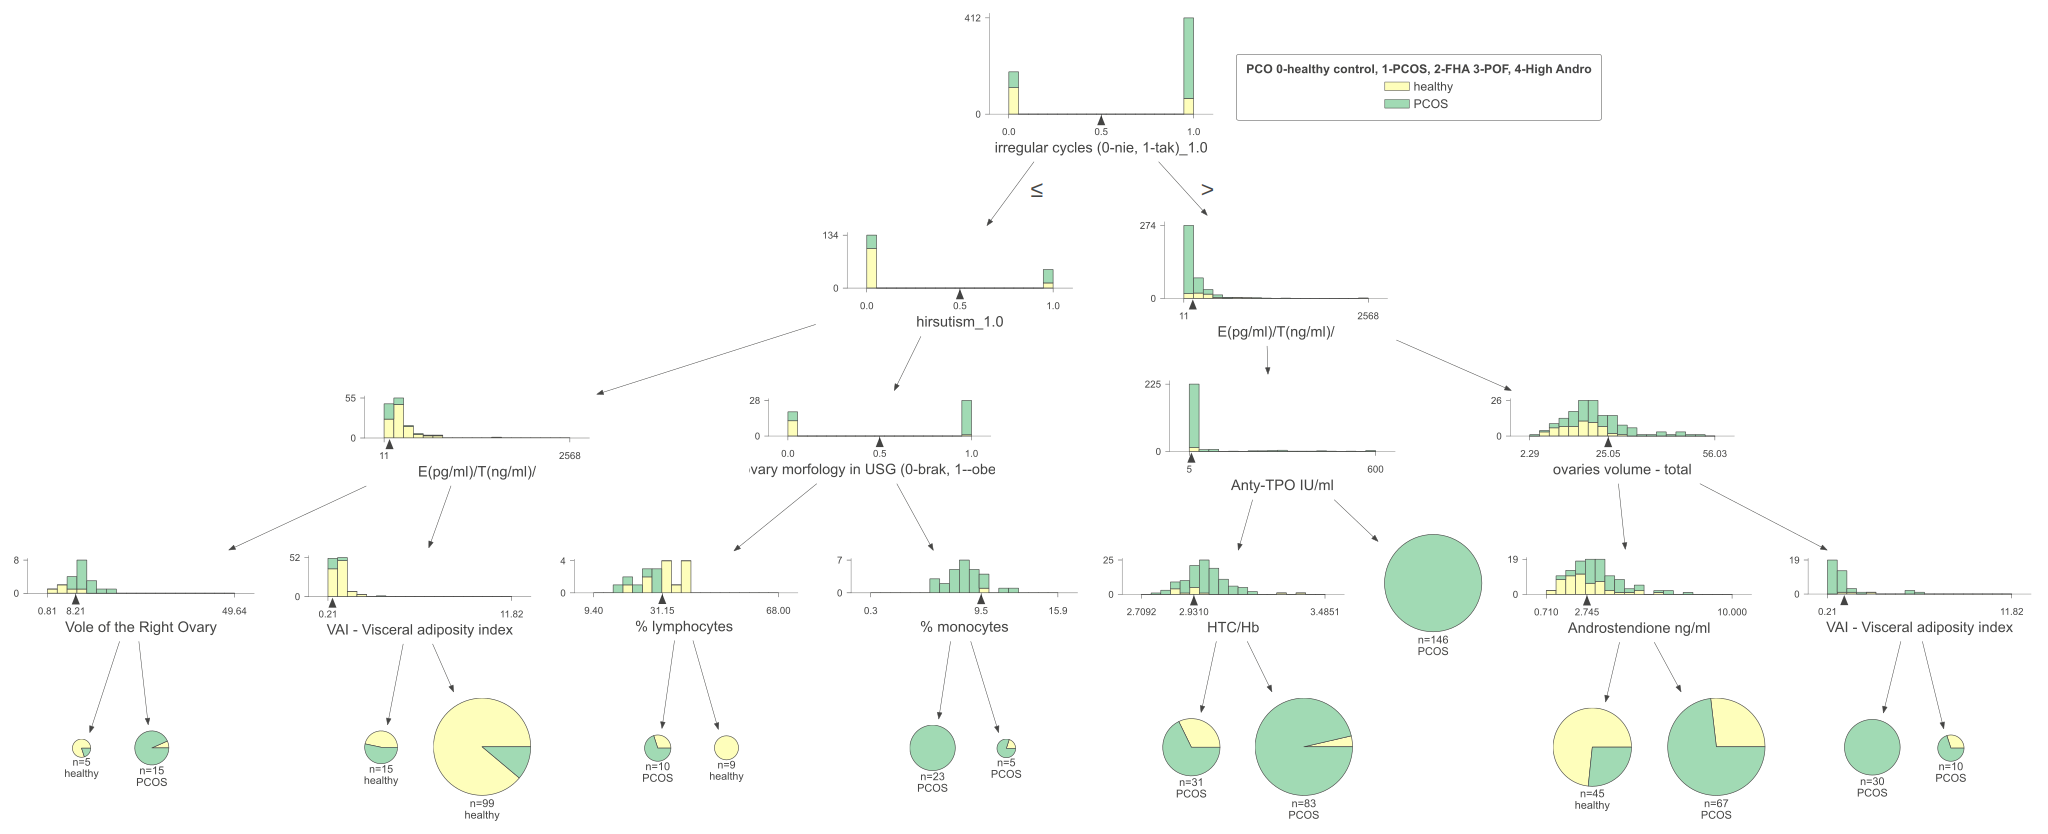

In [50]:
#  SMOTE - tree drawn with only real data
plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


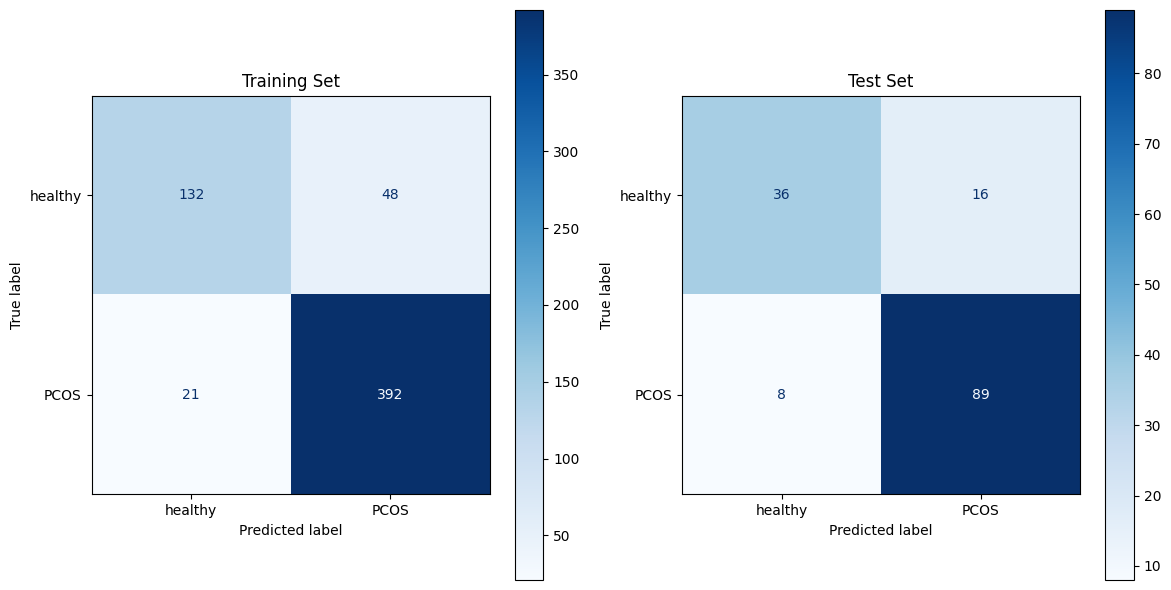

Training set
              precision    recall  f1-score   support

     healthy       0.86      0.73      0.79       180
        PCOS       0.89      0.95      0.92       413

    accuracy                           0.88       593
   macro avg       0.88      0.84      0.86       593
weighted avg       0.88      0.88      0.88       593

Test set
              precision    recall  f1-score   support

     healthy       0.82      0.69      0.75        52
        PCOS       0.85      0.92      0.88        97

    accuracy                           0.84       149
   macro avg       0.83      0.80      0.82       149
weighted avg       0.84      0.84      0.84       149



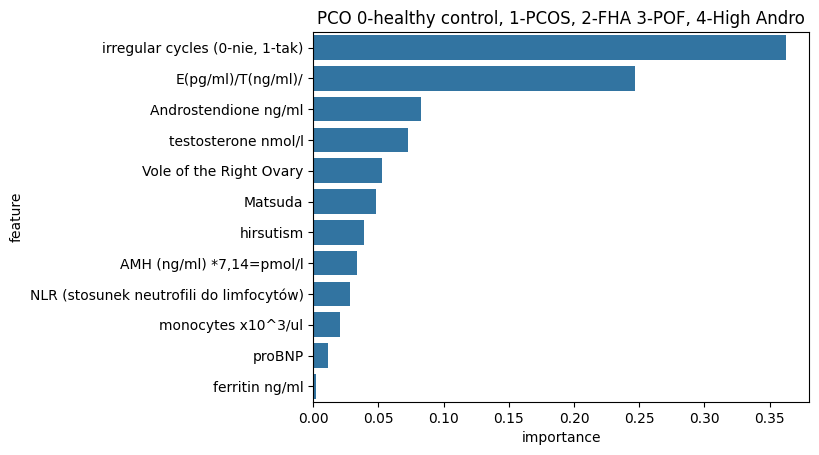

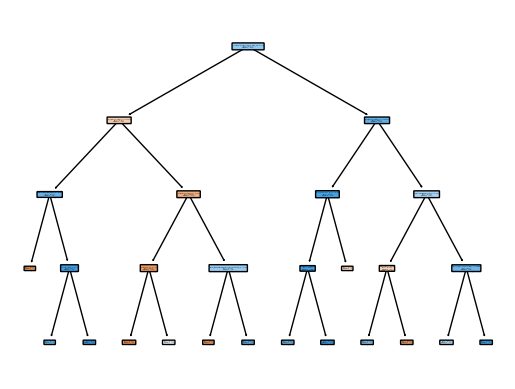

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


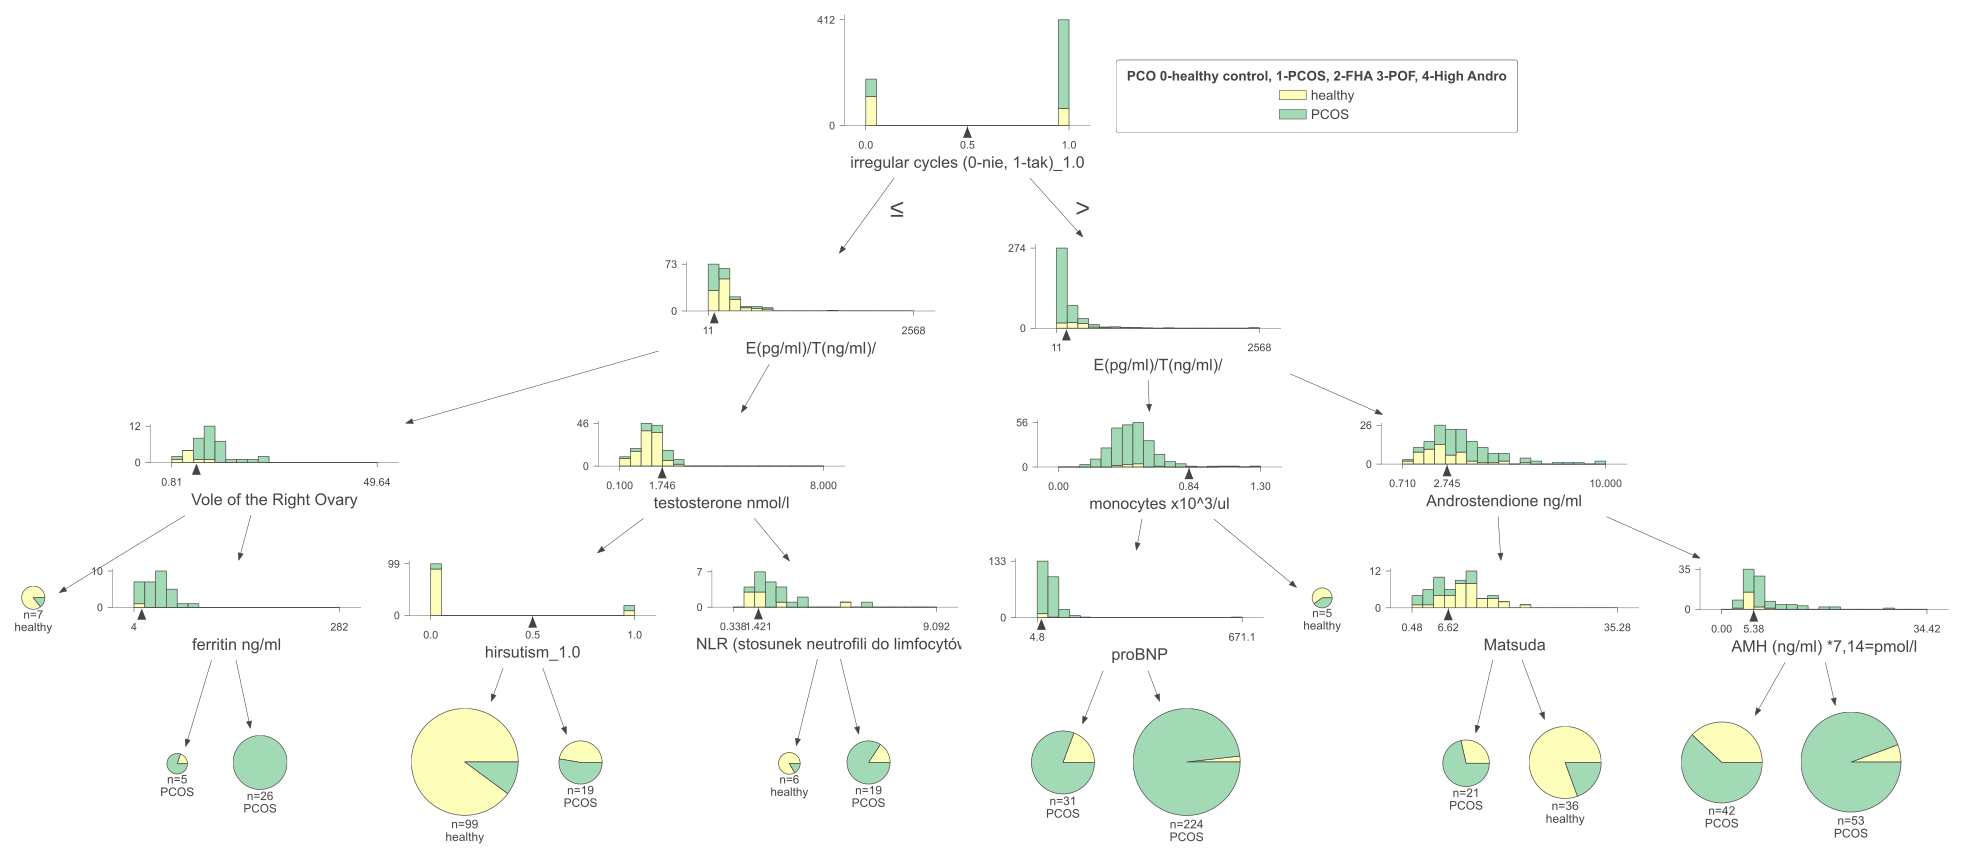

In [51]:
# Not SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, min_samples_split=4, class_weight=None)
# model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=3, min_samples_split=6, class_weight=None, splitter='best')

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


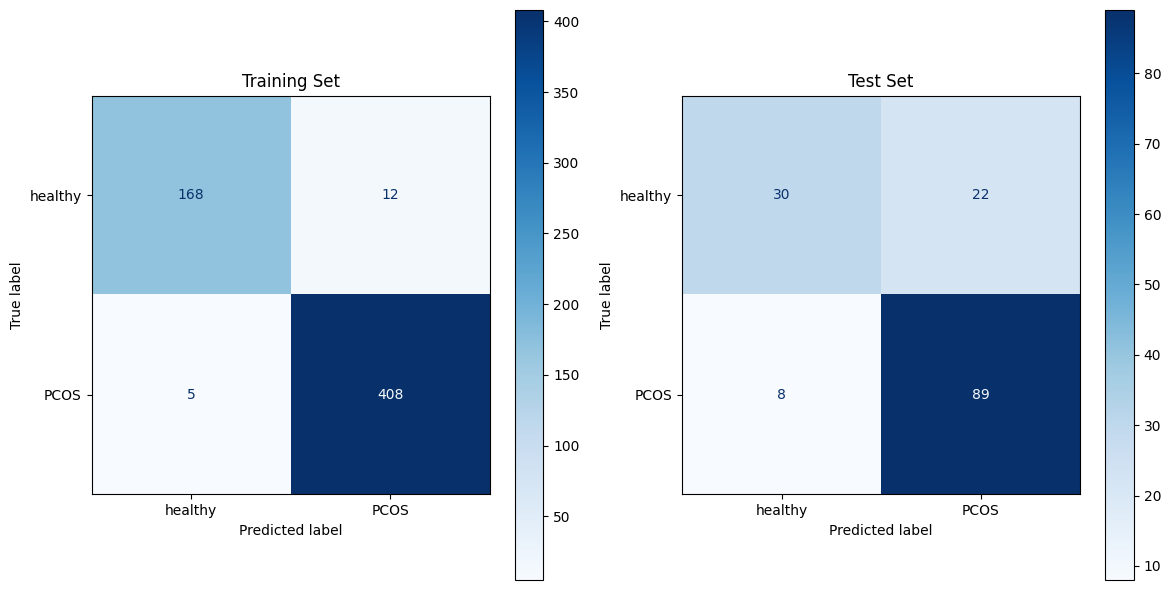

Training set
              precision    recall  f1-score   support

     healthy       0.97      0.93      0.95       180
        PCOS       0.97      0.99      0.98       413

    accuracy                           0.97       593
   macro avg       0.97      0.96      0.97       593
weighted avg       0.97      0.97      0.97       593

Test set
              precision    recall  f1-score   support

     healthy       0.79      0.58      0.67        52
        PCOS       0.80      0.92      0.86        97

    accuracy                           0.80       149
   macro avg       0.80      0.75      0.76       149
weighted avg       0.80      0.80      0.79       149



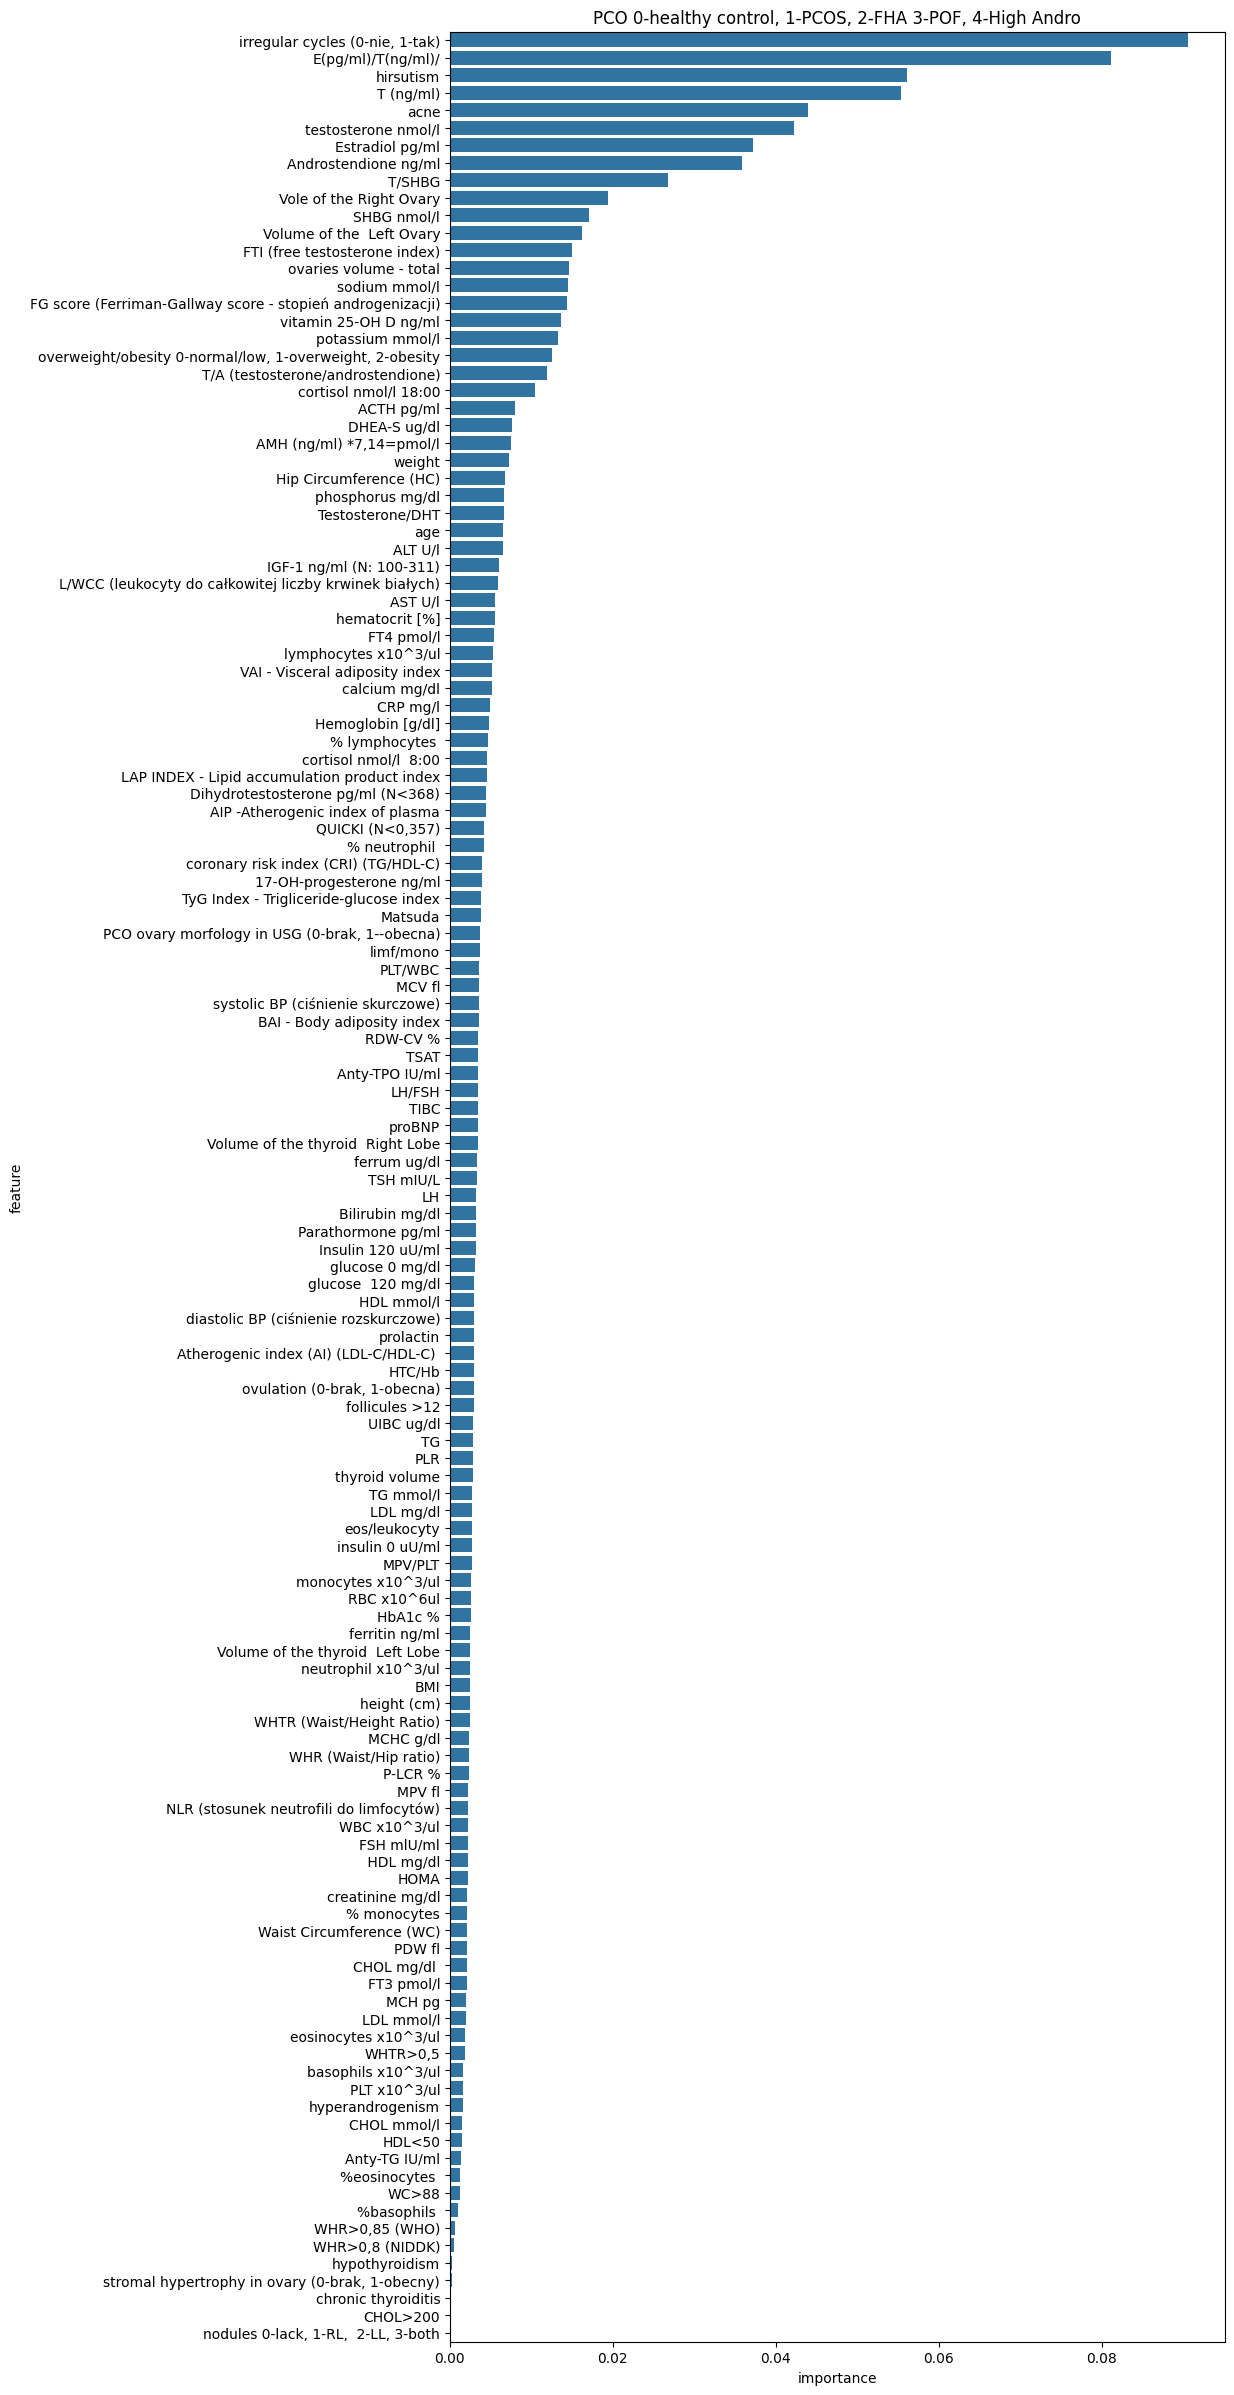

In [53]:
#  SMOTE
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification_smote(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_rf)


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


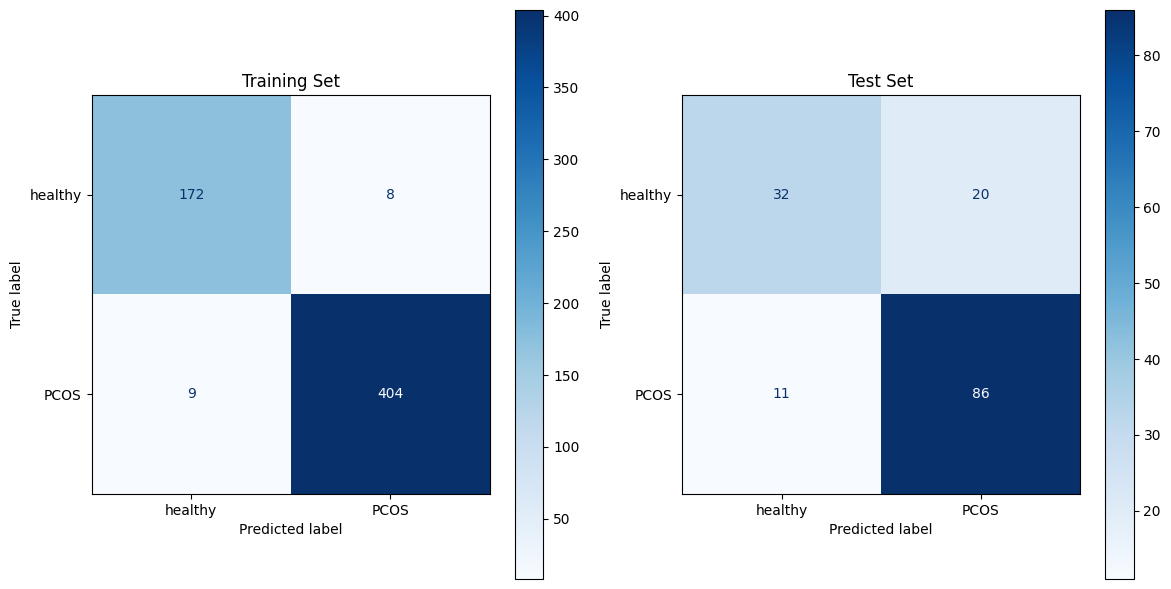

Training set
              precision    recall  f1-score   support

     healthy       0.95      0.96      0.95       180
        PCOS       0.98      0.98      0.98       413

    accuracy                           0.97       593
   macro avg       0.97      0.97      0.97       593
weighted avg       0.97      0.97      0.97       593

Test set
              precision    recall  f1-score   support

     healthy       0.74      0.62      0.67        52
        PCOS       0.81      0.89      0.85        97

    accuracy                           0.79       149
   macro avg       0.78      0.75      0.76       149
weighted avg       0.79      0.79      0.79       149



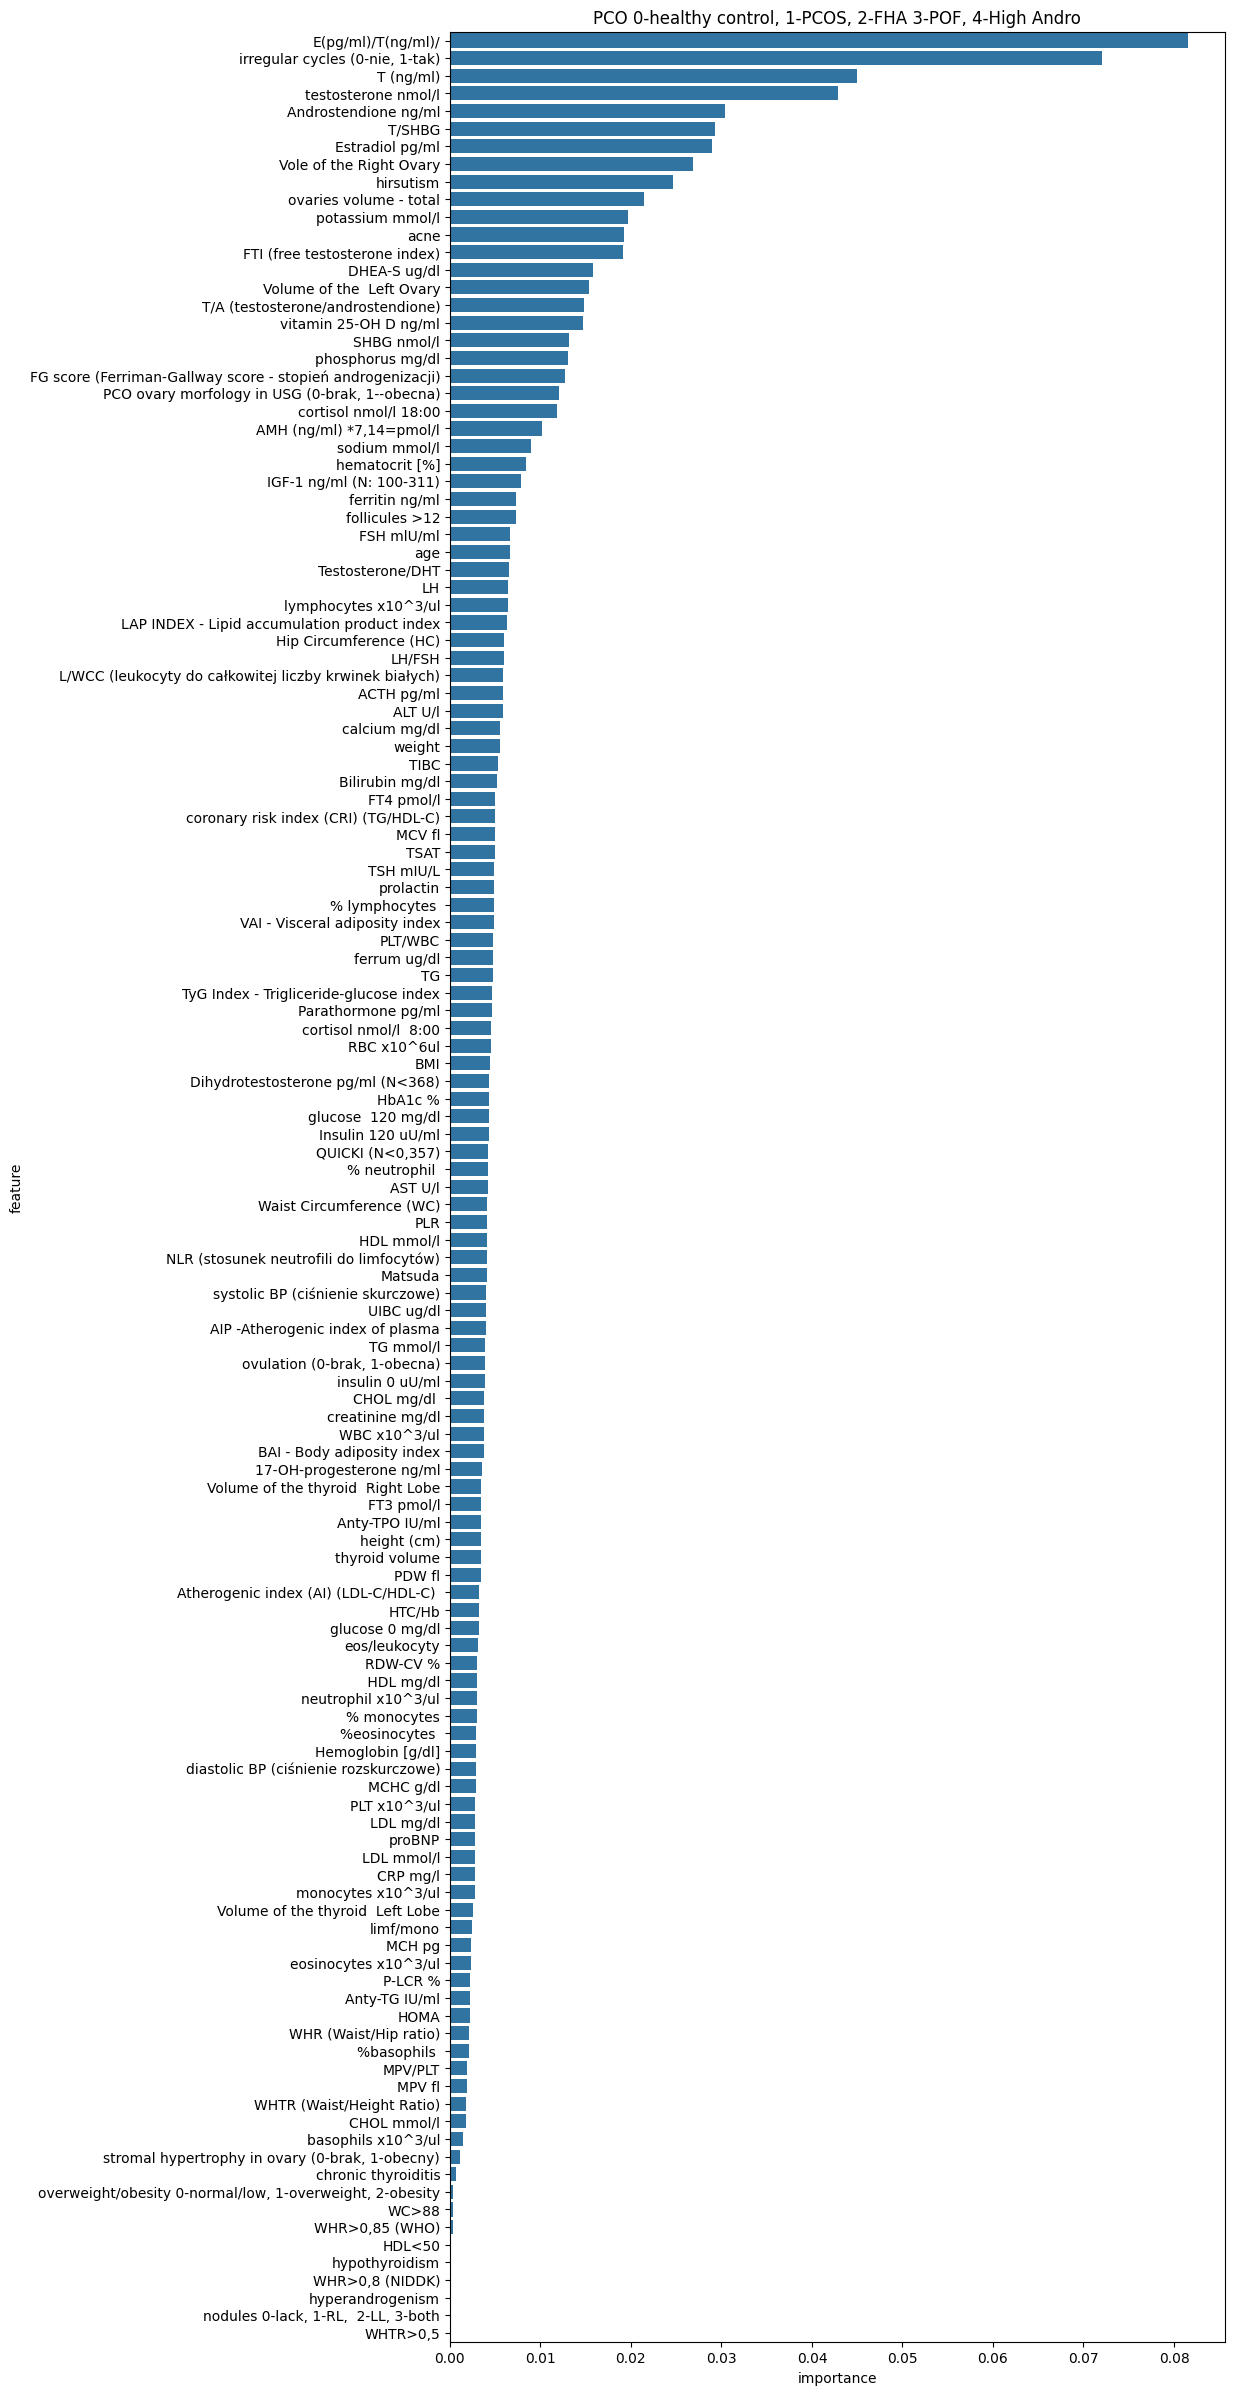

In [45]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


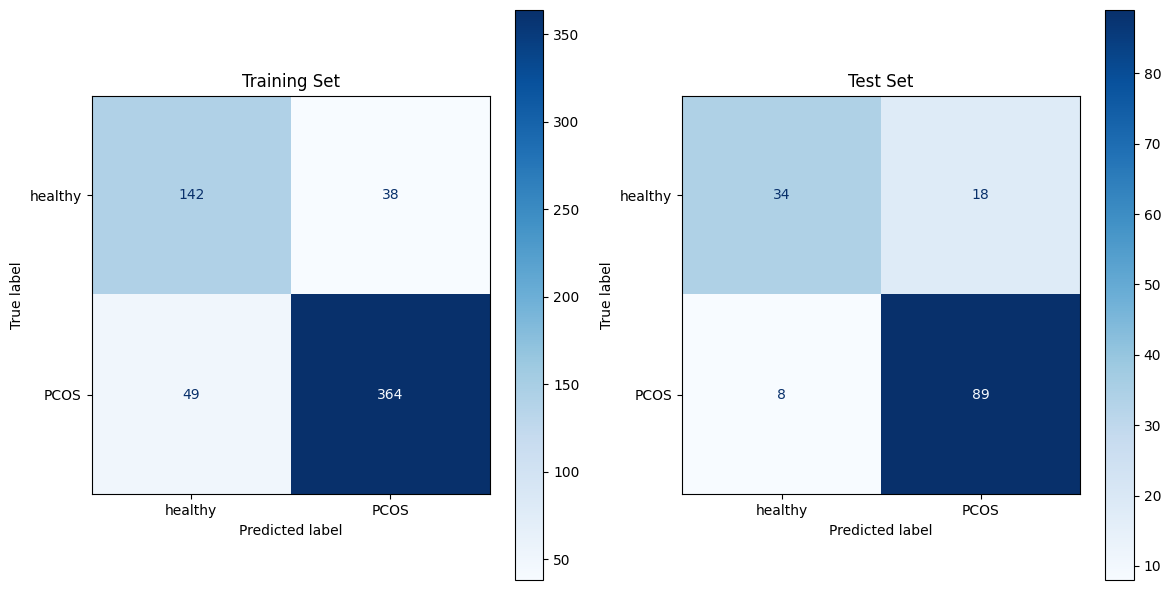

Training set
              precision    recall  f1-score   support

     healthy       0.74      0.79      0.77       180
        PCOS       0.91      0.88      0.89       413

    accuracy                           0.85       593
   macro avg       0.82      0.84      0.83       593
weighted avg       0.86      0.85      0.85       593

Test set
              precision    recall  f1-score   support

     healthy       0.81      0.65      0.72        52
        PCOS       0.83      0.92      0.87        97

    accuracy                           0.83       149
   macro avg       0.82      0.79      0.80       149
weighted avg       0.82      0.83      0.82       149



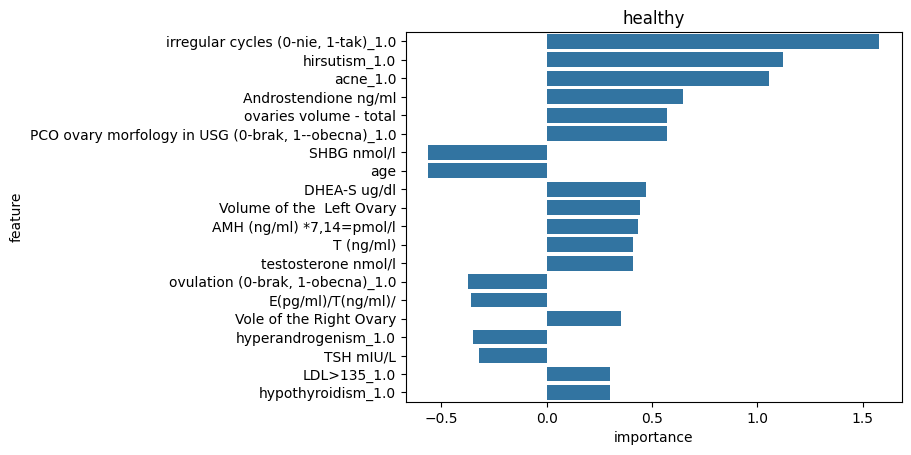

In [54]:
#  SMOTE
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification_smote(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_pipeline, categorical_imputer_pipeline, get_feature_importance_logistic_regressison)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


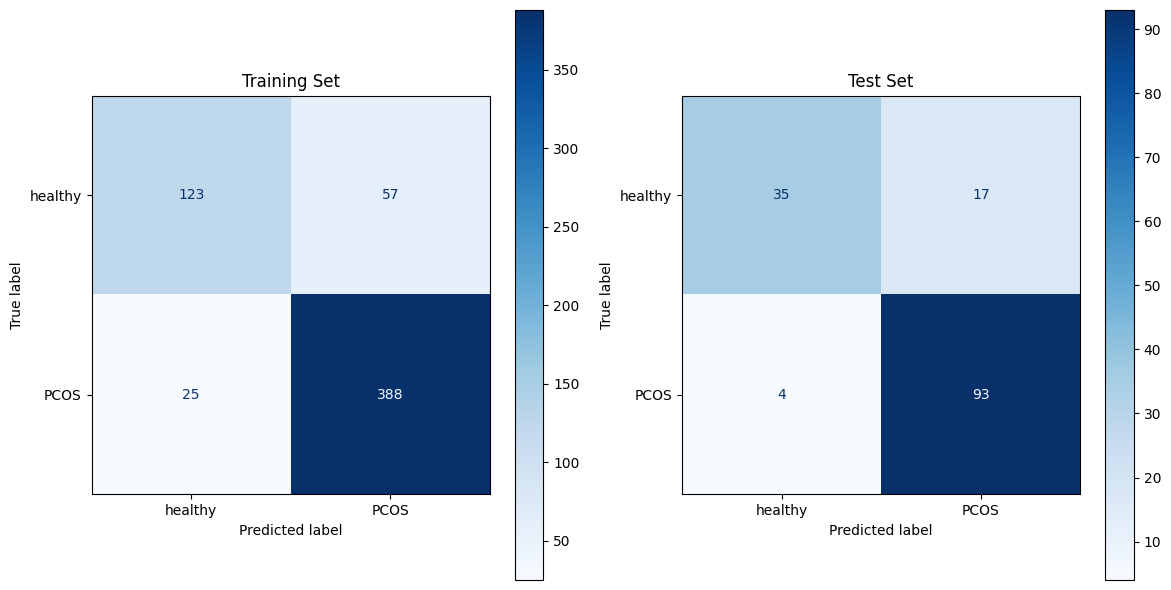

Training set
              precision    recall  f1-score   support

     healthy       0.83      0.68      0.75       180
        PCOS       0.87      0.94      0.90       413

    accuracy                           0.86       593
   macro avg       0.85      0.81      0.83       593
weighted avg       0.86      0.86      0.86       593

Test set
              precision    recall  f1-score   support

     healthy       0.90      0.67      0.77        52
        PCOS       0.85      0.96      0.90        97

    accuracy                           0.86       149
   macro avg       0.87      0.82      0.83       149
weighted avg       0.86      0.86      0.85       149



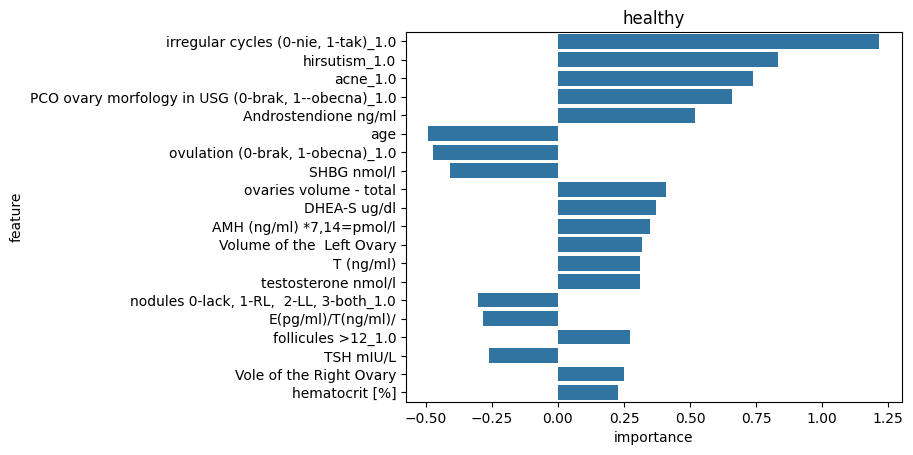

In [55]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [19]:
selected_features_map = {}

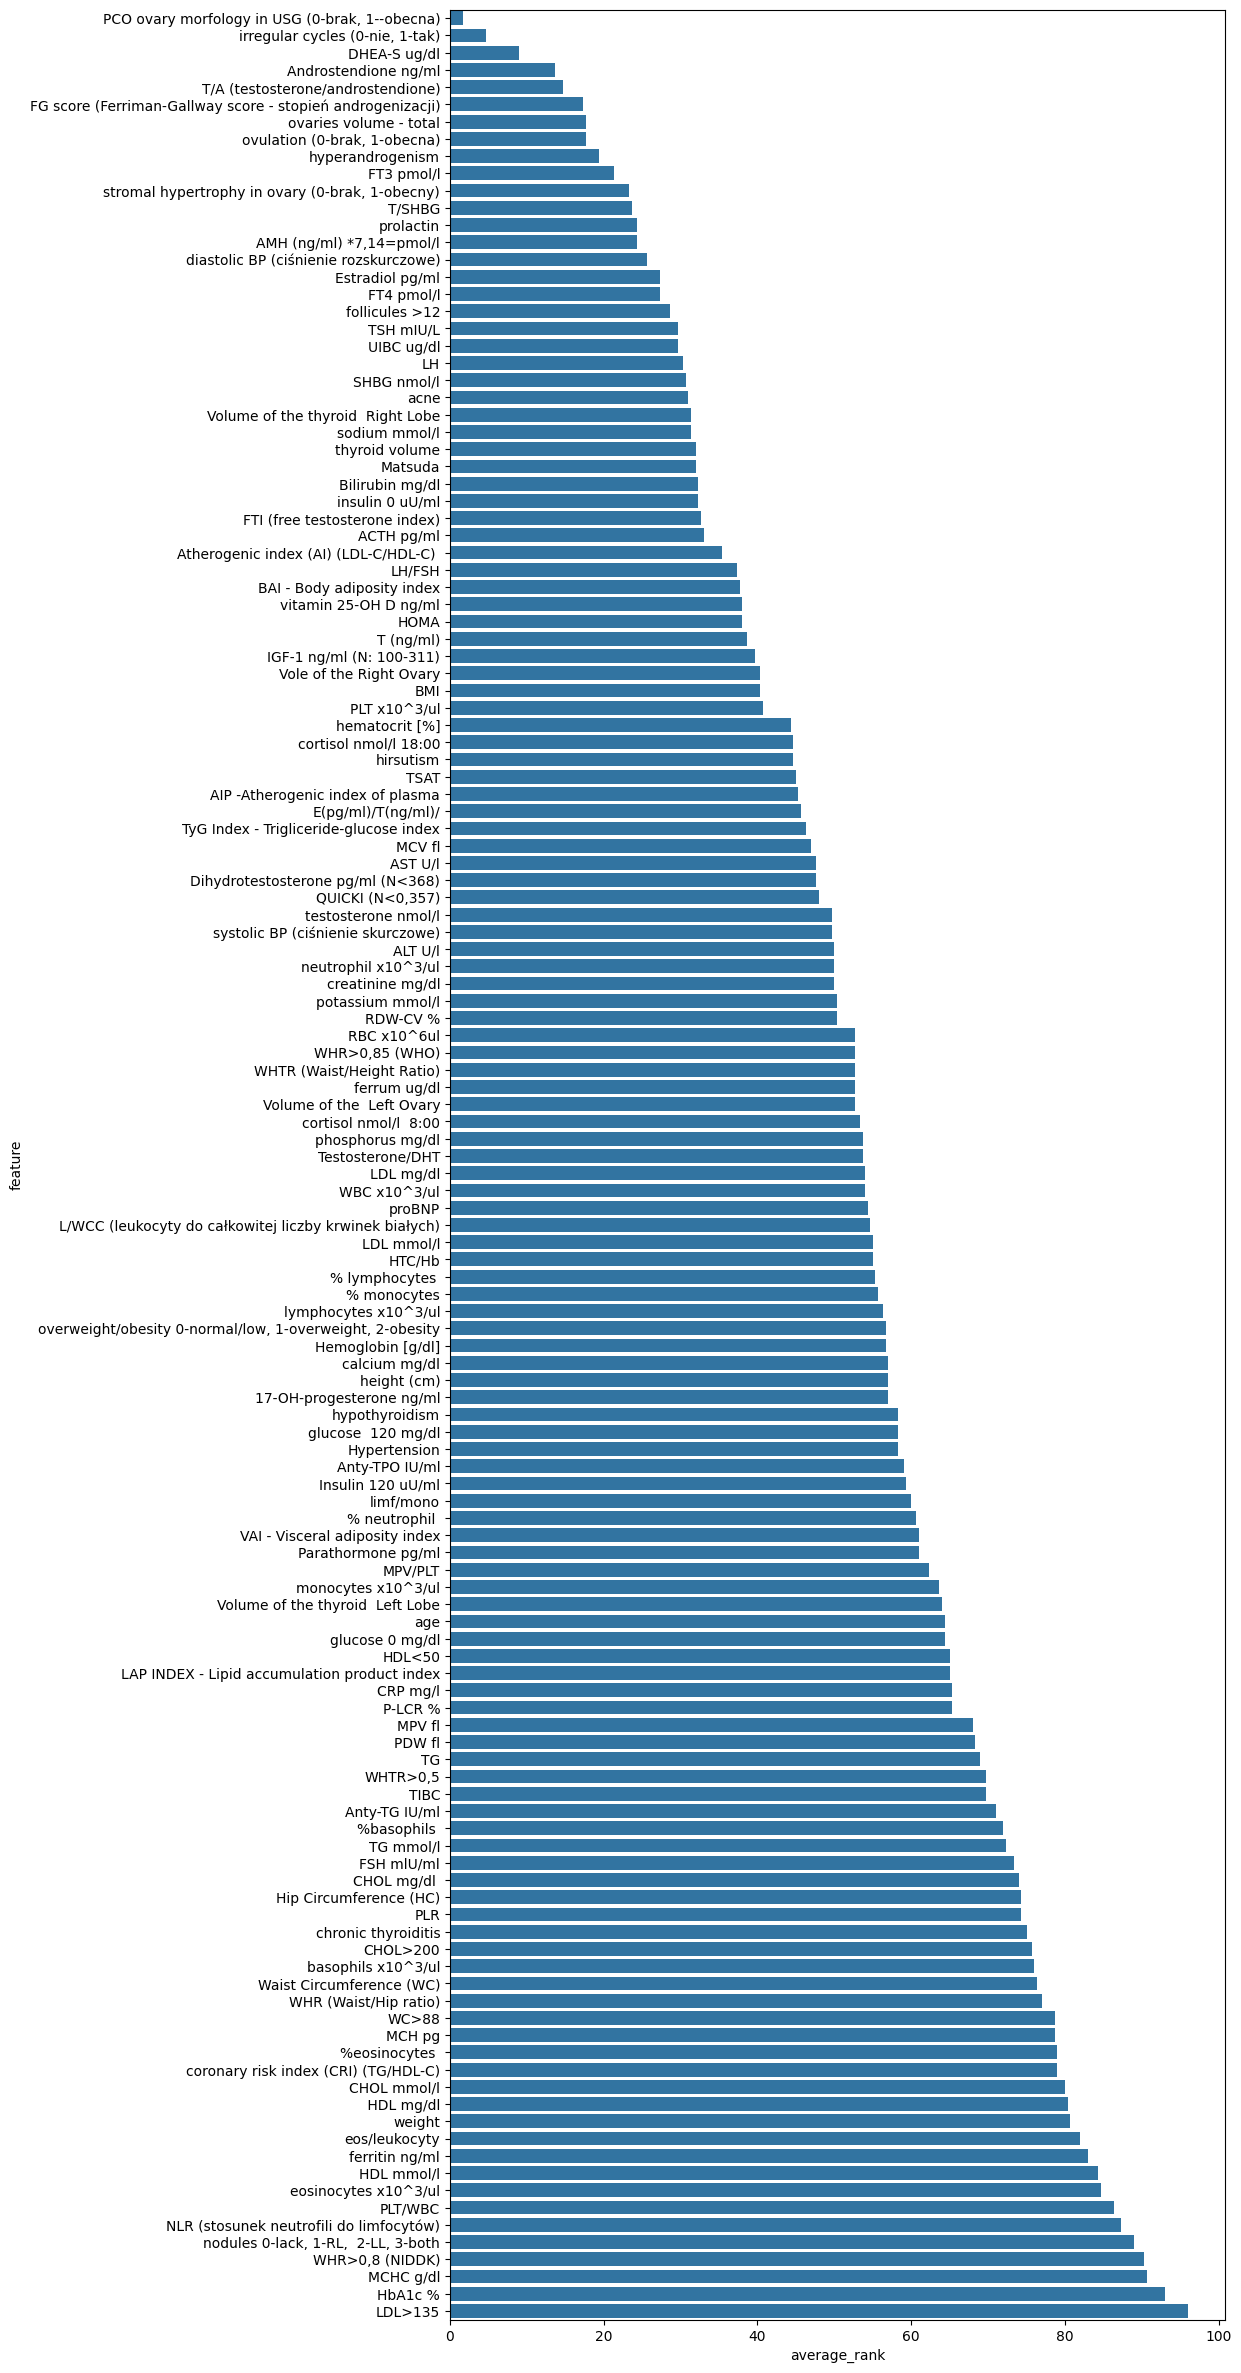

In [20]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [21]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 38 features:


['PCO ovary morfology in USG (0-brak, 1--obecna)',
 'irregular cycles (0-nie, 1-tak)',
 'DHEA-S ug/dl',
 'Androstendione ng/ml',
 'T/A (testosterone/androstendione)',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'ovaries volume - total',
 'ovulation (0-brak, 1-obecna)',
 'hyperandrogenism',
 'FT3 pmol/l',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'T/SHBG',
 'prolactin',
 'AMH (ng/ml) *7,14=pmol/l',
 'diastolic BP (ciśnienie rozskurczowe)',
 'Estradiol pg/ml',
 'FT4 pmol/l',
 'follicules >12',
 'TSH mIU/L',
 'UIBC ug/dl',
 'LH',
 'SHBG nmol/l',
 'acne',
 'Volume of the thyroid  Right Lobe',
 'sodium mmol/l',
 'thyroid volume',
 'Matsuda',
 'Bilirubin mg/dl',
 'insulin 0 uU/ml',
 'FTI (free testosterone index)',
 'ACTH pg/ml',
 'Atherogenic index (AI) (LDL-C/HDL-C) ',
 'LH/FSH',
 'BAI - Body adiposity index',
 'vitamin 25-OH D ng/ml',
 'HOMA',
 'T (ng/ml)',
 'IGF-1 ng/ml (N: 100-311)']

## Feature selection

### Chi 2

In [22]:
def get_original_feature_importance_df(transformed_feature_importance_df, importance_label='importance'):
    transformed_feature_importance_df['original_feature'] = transformed_feature_importance_df['feature'].apply(lambda x: x.split('_')[0])
    original_feature_importance_df = transformed_feature_importance_df.groupby('original_feature')[importance_label].sum().reset_index()
    original_feature_importance_df.rename(columns={'original_feature': 'feature'}, inplace=True)

    return original_feature_importance_df.sort_values(by=importance_label, key=abs, ascending=False)


def feature_selection_chi2(feature_selection_model, target_attribute, continuous_preprocessor, categorical_preprocessor,  X_train, y_train):
    preprocessor = ColumnTransformer(
        verbose_feature_names_out=False,
        transformers=[
            ('num', continuous_preprocessor, get_continuous_attributes_except(target_attribute)),
            ('cat', categorical_preprocessor, get_categorical_attributes_except(target_attribute))
        ])
    pipeline = Pipeline([('preprocessor', preprocessor), ('feature_selection', feature_selection_model)])

    X_new = pipeline.fit_transform(X_train, y_train)

    feature_importances = dict(zip(preprocessor.get_feature_names_out(), feature_selection_model.pvalues_))
    sorted_importances = sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=False)
    df_importances = pd.DataFrame(sorted_importances, columns=['feature', 'p_value'])

    original_feature_importance = get_original_feature_importance_df(df_importances, importance_label='p_value')
    original_feature_importance.sort_values(by='p_value', ascending=True, inplace=True)


    selected_features = original_feature_importance[original_feature_importance['p_value'] < 0.05]
    selected_feature_names = list(selected_features['feature'].values)
    print(f'Selected {len(selected_feature_names)} features')

    # print(selected_feature_names)
    # selected_indices = feature_selection_model.get_support(indices=True)
    # selected_feature_names = [preprocessor.get_feature_names_out()[i] for i in selected_indices]

    plt.figure(figsize=(10, 30))
    sns.barplot(original_feature_importance, x="p_value", y="feature", legend=False)
    plt.show()

    return selected_feature_names

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Selected 19 features


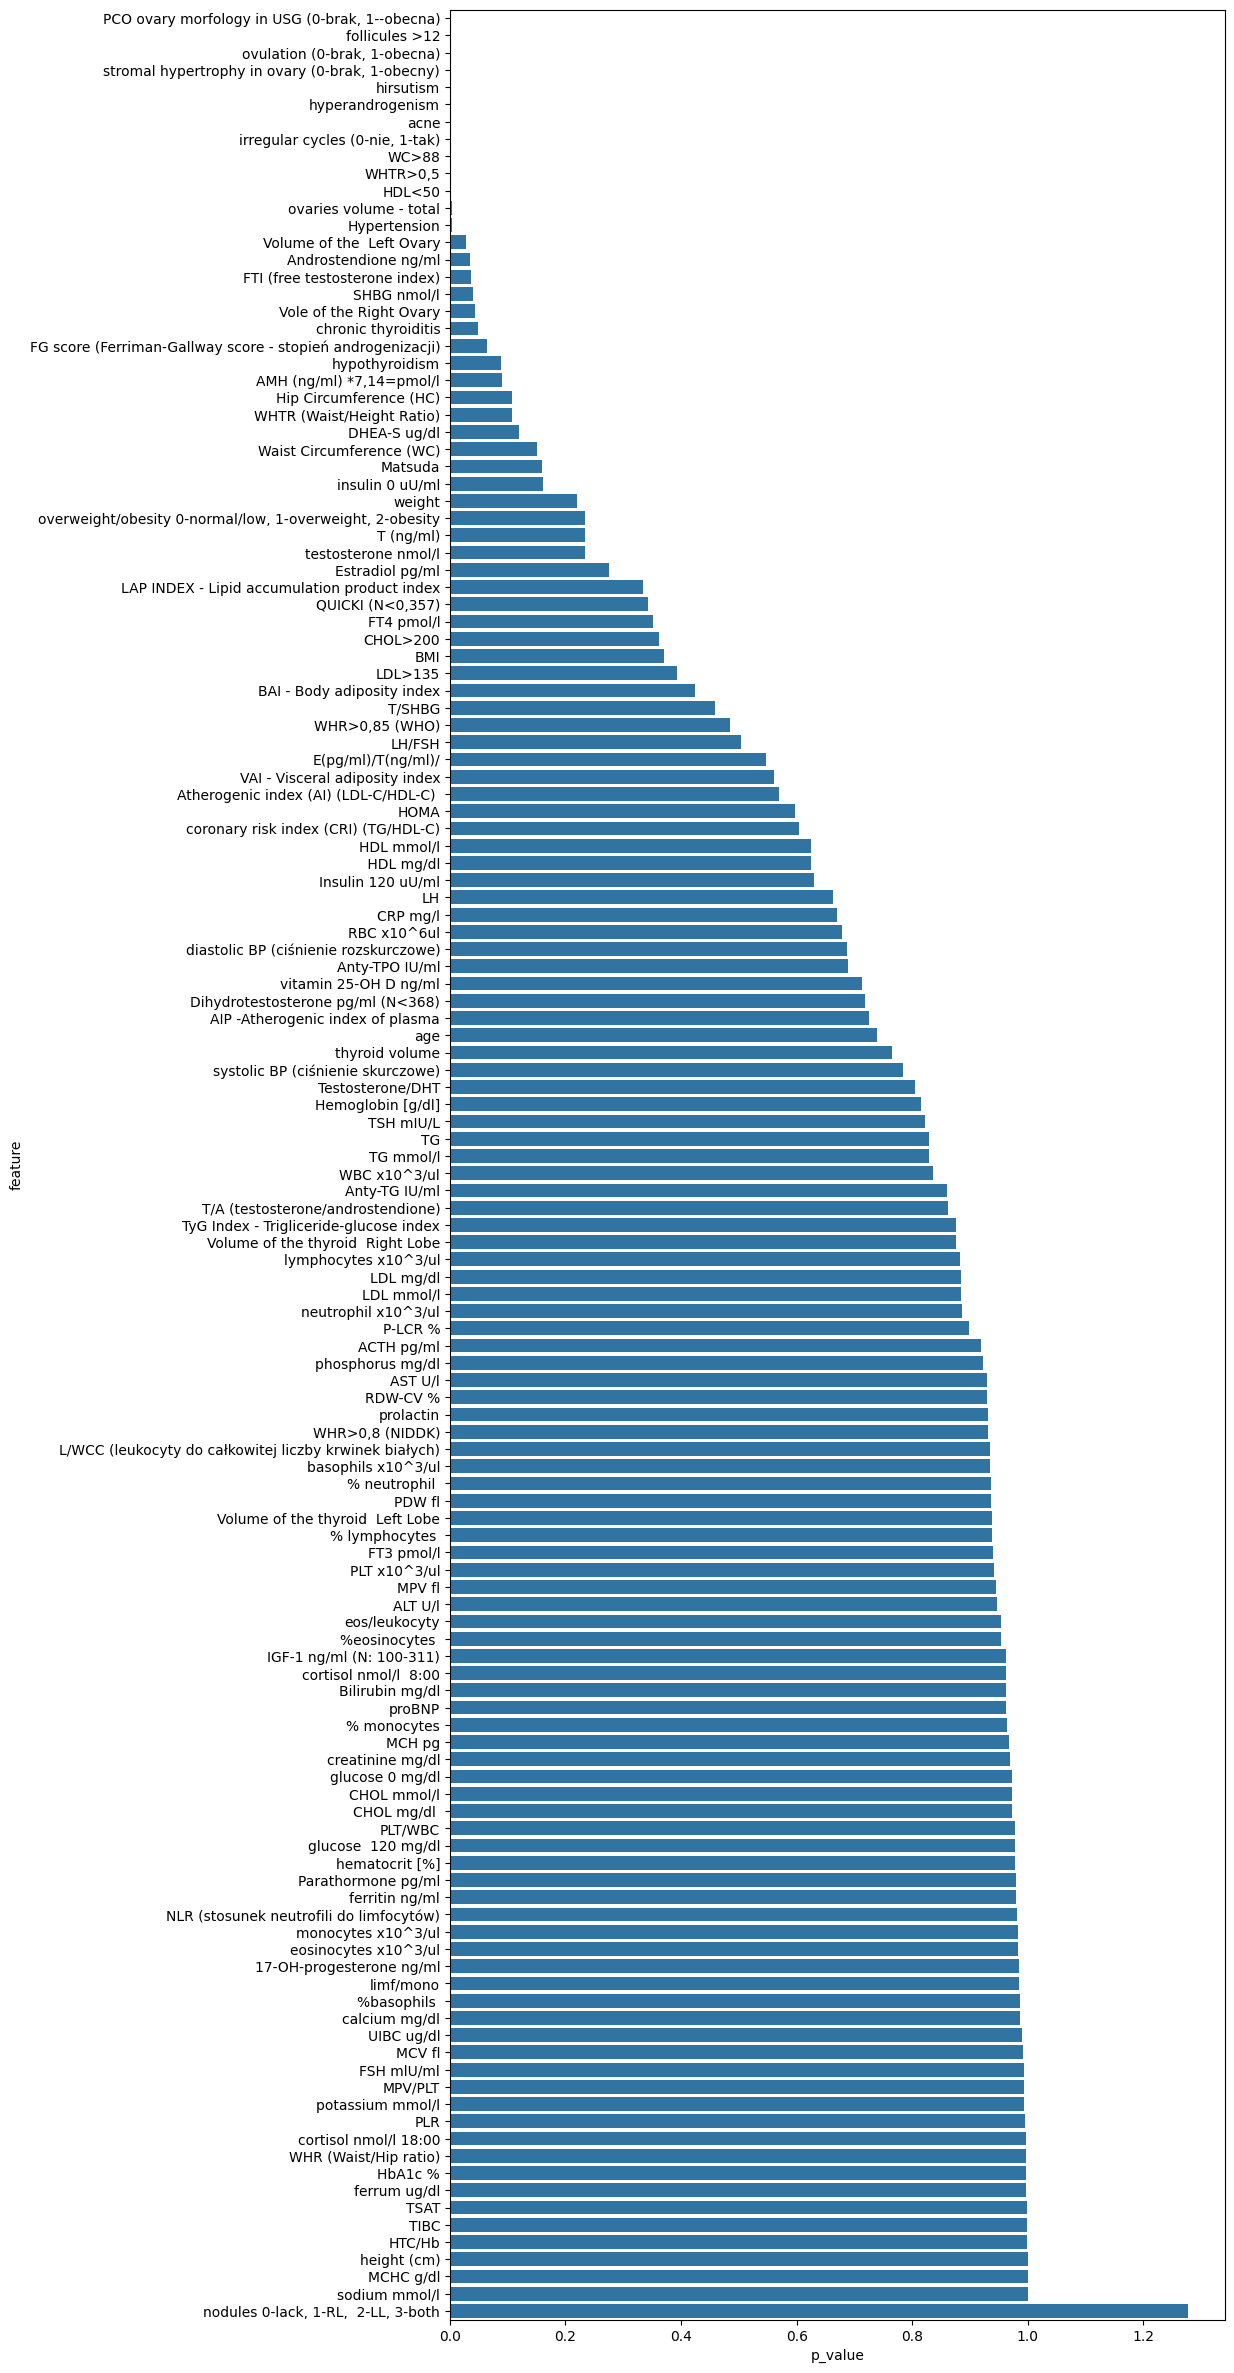

['PCO ovary morfology in USG (0-brak, 1--obecna)',
 'follicules >12',
 'ovulation (0-brak, 1-obecna)',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'hirsutism',
 'hyperandrogenism',
 'acne',
 'irregular cycles (0-nie, 1-tak)',
 'WC>88',
 'WHTR>0,5',
 'HDL<50',
 'ovaries volume - total',
 'Hypertension',
 'Volume of the  Left Ovary',
 'Androstendione ng/ml',
 'FTI (free testosterone index)',
 'SHBG nmol/l',
 'Vole of the Right Ovary',
 'chronic thyroiditis']

In [23]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

In [24]:
def feature_selection_mutual_info(X_train, y_train):
    preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

    pipeline = Pipeline([('preprocessor', preprocessor)])

    X_transformed = pipeline.fit_transform(X_train, y_train)

    mutual_info_scores = mutual_info_classif(X_transformed, y_train)
    feature_names = preprocessor.get_feature_names_out()

    feature_importances = pd.DataFrame({'feature': feature_names, 'mutual_info_score': mutual_info_scores})
    feature_importances_sorted = feature_importances.sort_values(by='mutual_info_score', key=abs, ascending=False)

    plt.figure(figsize=(10, 30))
    sns.barplot(feature_importances_sorted, x="mutual_info_score", y="feature", legend=False)
    plt.show()

    return feature_importances_sorted

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


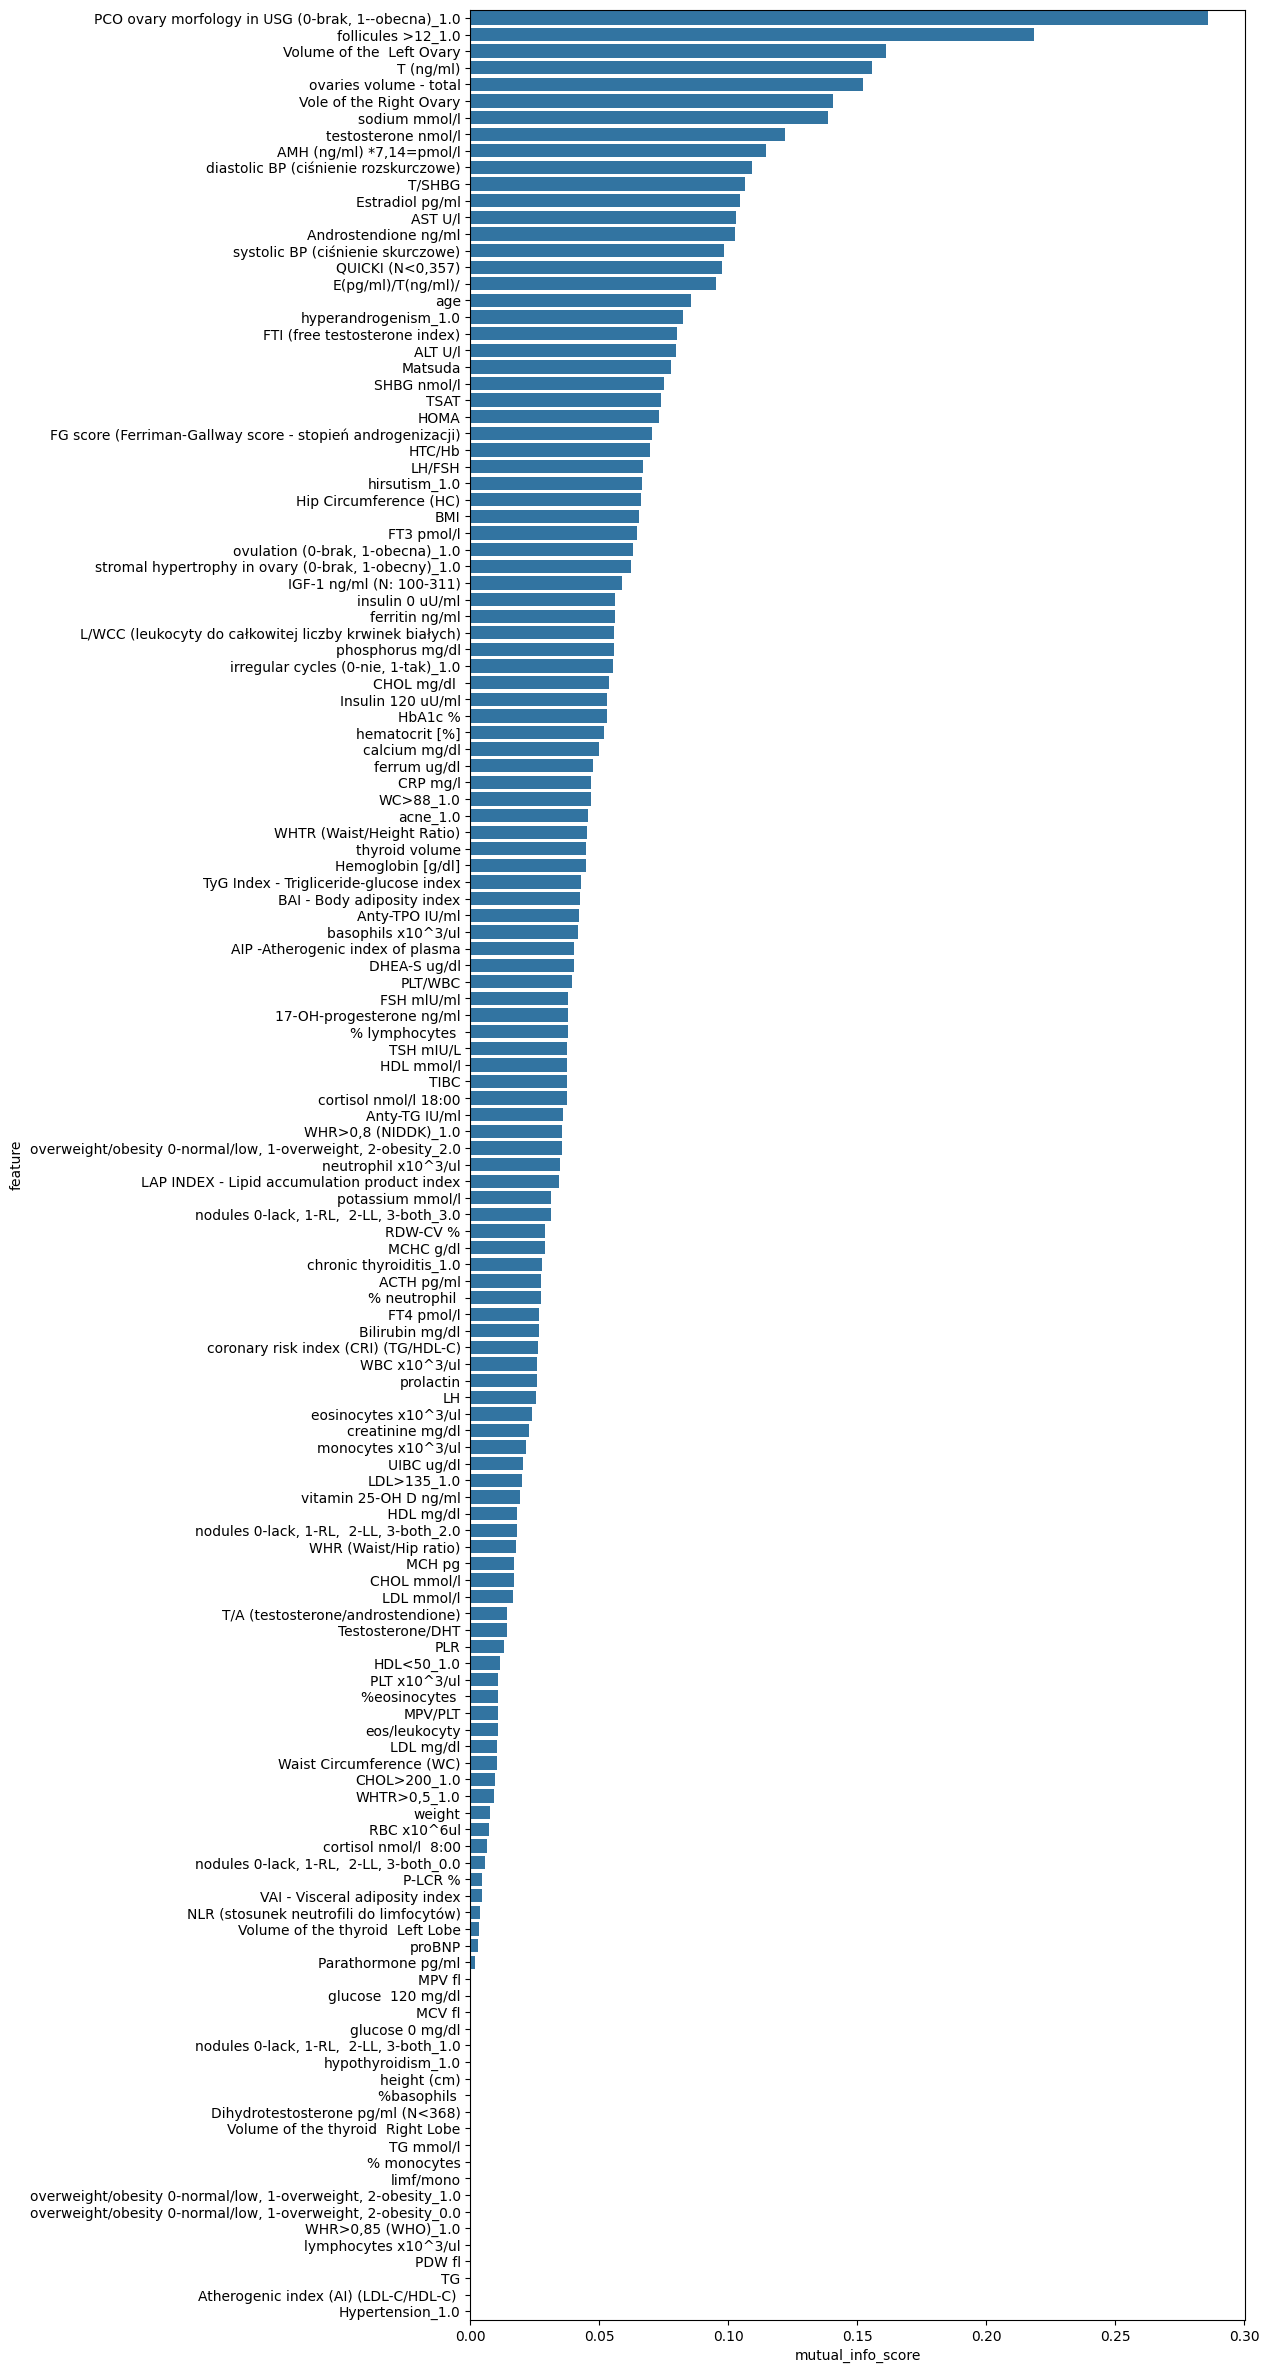

Selected 112 features


In [25]:
selected_feature_names_mutual_info = feature_selection_mutual_info(X_train, y_train)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Optimal number of features: 36


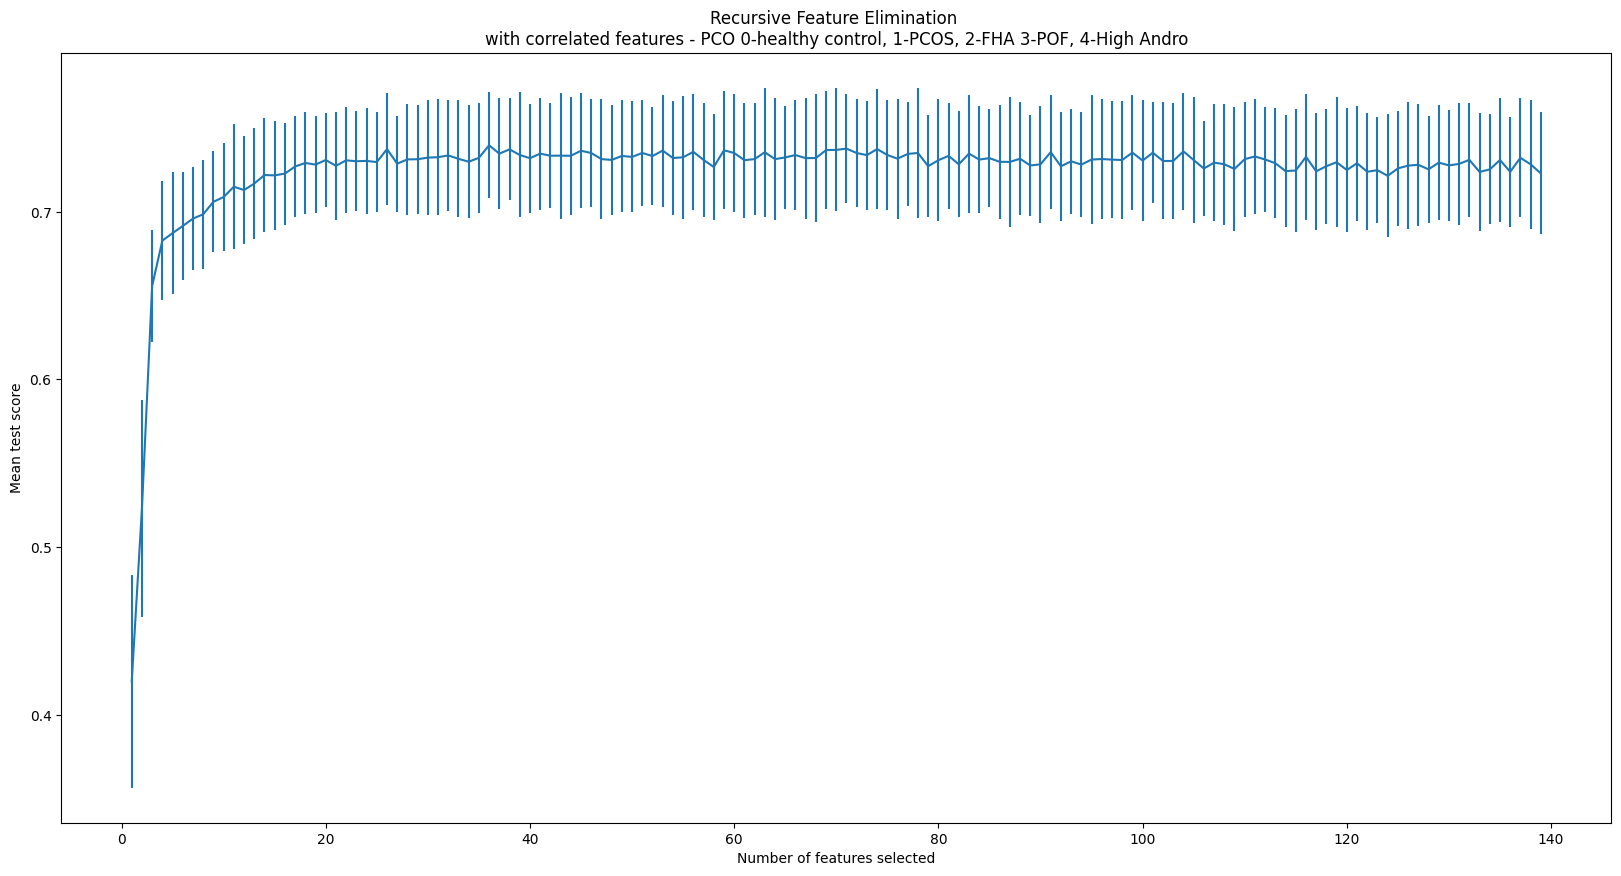

['SHBG nmol/l',
 'E(pg/ml)/T(ng/ml)/',
 'Estradiol pg/ml',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'hyperandrogenism',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'FT4 pmol/l',
 'FTI (free testosterone index)',
 'follicules >12',
 'HOMA',
 'diastolic BP (ciśnienie rozskurczowe)',
 'calcium mg/dl',
 'Volume of the thyroid  Right Lobe',
 'Volume of the  Left Ovary',
 'Vole of the Right Ovary',
 'LH/FSH',
 'MCV fl',
 'T/SHBG',
 'T/A (testosterone/androstendione)',
 'T (ng/ml)',
 'Dihydrotestosterone pg/ml (N<368)',
 'DHEA-S ug/dl',
 'FT3 pmol/l',
 'insulin 0 uU/ml',
 'testosterone nmol/l',
 'sodium mmol/l',
 'prolactin',
 'proBNP',
 'ALT U/l',
 'AMH (ng/ml) *7,14=pmol/l',
 'Androstendione ng/ml',
 'QUICKI (N<0,357)',
 'irregular cycles (0-nie, 1-tak)',
 'Bilirubin mg/dl',
 'BAI - Body adiposity index',
 'ovaries volume - total']

In [26]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

In [27]:
preprocessor = ColumnTransformer(
verbose_feature_names_out=False,
transformers=[
    ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
    ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
])

pipeline = Pipeline([('preprocessor', preprocessor)])

pipeline.set_output(transform='default')

X_train_transformed = pipeline.fit_transform(X_train, y_train)


# TODO: transform to a form of the others, if it makes any sense
scores = gini_index.gini_index(X_train_transformed, y_train.astype(int))

gini_index_scores = pd.DataFrame({'features':  preprocessor.get_feature_names_out(), 'gini_index': scores})
gini_index_scores.sort_values(by='gini_index').head(5)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


features  gini_index
124  PCO ovary morfology in USG (0-brak, 1--obecna)_1.0    0.472646
0                              IGF-1 ng/ml (N: 100-311)    0.500000
88                                       Anty-TPO IU/ml    0.500000
89                                        Anty-TG IU/ml    0.500000
90                                           FSH mlU/ml    0.500000

In [ ]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [ ]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

4
['FTI (free testosterone index)', 'Androstendione ng/ml', 'ovaries volume - total', 'SHBG nmol/l']


0
0  FTI (free testosterone index)
1           Androstendione ng/ml
2         ovaries volume - total
3                    SHBG nmol/l

In [ ]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

149
['WHTR>0,5', 'LH/FSH', 'CHOL mmol/l', 'MPV/PLT', 'proBNP', 'Bilirubin mg/dl', 'hirsutism', 'hirsutism_1.0', 'acne', 'Volume of the thyroid  Right Lobe', '% lymphocytes ', 'height (cm)', 'nodules 0-lack, 1-RL,  2-LL, 3-both_1.0', 'PLT/WBC', 'PLR', 'MCHC g/dl', 'follicules >12', 'PDW fl', 'TSH mIU/L', 'Insulin 120 uU/ml', 'neutrophil x10^3/ul', 'basophils x10^3/ul', 'RDW-CV %', ' HDL mg/dl', 'T/A (testosterone/androstendione)', 'monocytes x10^3/ul', 'LH', 'Hip Circumference (HC)', 'calcium mg/dl', 'Waist Circumference (WC)', 'age', 'AST U/l', 'IGF-1 ng/ml (N: 100-311)', 'AMH (ng/ml) *7,14=pmol/l', '%basophils ', 'Androstendione ng/ml', 'diastolic BP (ciśnienie rozskurczowe)', 'DHEA-S ug/dl', 'nodules 0-lack, 1-RL,  2-LL, 3-both_0.0', 'UIBC ug/dl', 'TyG Index - Trigliceride-glucose index', 'FTI (free testosterone index)', 'Hypertension_1.0', 'prolactin', 'NLR (stosunek neutrofili do limfocytów)', 'VAI - Visceral adiposity index', 'TG', 'Hypertension', 'T/SHBG', 'L/WCC (leukocyty do ca

# PCO vs healthy

In [26]:
dataset_file_path = 'data/preprocessed_dataset.csv'
df = pd.read_csv(dataset_file_path)

#  remove all except PCO and healthy
df.loc[(df[PCO] != 0) & (df[PCO] != 1), PCO] = np.nan

CLASS_NAMES = ['healthy', 'PCOS']

df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## hyperparam tuning

### Decision tree

In [27]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [3, 4, 5],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}
Best score (f1_weighted): 0.7896103924622742


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


params  mean_train_score  mean_test_score
20  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}          0.933303         0.789610
9   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}          0.899535         0.786060
21  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.929532         0.784444
11  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}          0.899279         0.784210
12  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.896394         0.784185
10  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}          0.899686         0.784109
19  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}          0.933505         0.783844
15  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.891971         0.783840
22  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.929556         0.782991
23  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.929725         0.782607
16  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.891926         0.782509
24  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.921605         0.782490
17  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.892601         0.780819
1   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}          0.851686         0.779328
13  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.896798         0.778703
2   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}          0.851686         0.778478
18  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}          0.933672         0.778277
5   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.850850         0.777820
25  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.921250         0.777761
14  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.897031         0.777367
0   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}          0.851686         0.777167
4   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.

### Logistic regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 0.5}
Best score (f1_weighted): 0.8408034729630532


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


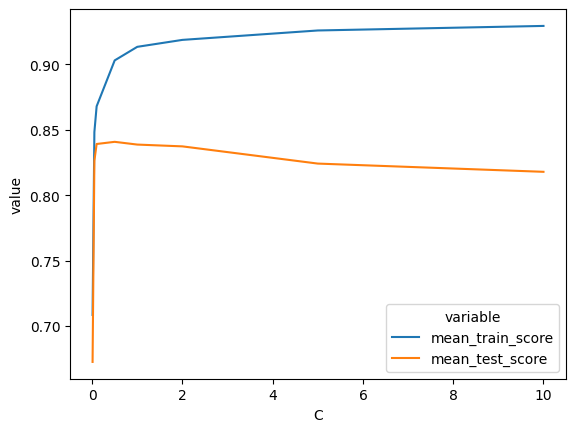

C  mean_train_score  mean_test_score
0  0.01          0.708395         0.672454
1  0.05          0.848266         0.826325
2   0.1          0.867987         0.839156
3   0.5          0.903094         0.840803
4     1          0.913467         0.838706
5     2          0.918782         0.837330
6     5          0.925980         0.824167
7    10          0.929464         0.817870

In [28]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.1

### Random forest

In [30]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}
Best score (f1_weighted): 0.8458740451925819


params  mean_train_score  mean_test_score
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.980046         0.845874
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.970216         0.844710
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.971201         0.843753
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.971363         0.843127
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.987352         0.842605
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.978069         0.842379
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.987209         0.839837
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.988335         0.839369
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.979331         0.839346

### SVC

In [34]:
model_svc = SVC(decision_function_shape='ovo')

param_grid_svc = {
    'model__kernel': ['linear', 'rbf', 'sigmoid'],
    'model__C': [0.1, 1, 10],
    'model__gamma': [0.1, 1, 10],
    # 'model__epsilon': [0.1, 0.2, 0.3],
}

svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
svc_h_scores.sort_values(by='mean_test_score', ascending=False)


Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
Best score (f1_weighted): 0.8576922036265995


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


params  mean_train_score  mean_test_score
19       {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'rbf'}          0.999859         0.857692
10        {'model__C': 1, 'model__gamma': 0.1, 'model__kernel': 'rbf'}          0.926419         0.836453
15      {'model__C': 1, 'model__gamma': 10, 'model__kernel': 'linear'}          0.910784         0.832355
9      {'model__C': 1, 'model__gamma': 0.1, 'model__kernel': 'linear'}          0.910784         0.832355
12       {'model__C': 1, 'model__gamma': 1, 'model__kernel': 'linear'}          0.910784         0.832355
0    {'model__C': 0.1, 'model__gamma': 0.1, 'model__kernel': 'linear'}          0.869790         0.826722
3      {'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'linear'}          0.869790         0.826722
6     {'model__C': 0.1, 'model__gamma': 10, 'model__kernel': 'linear'}          0.869790         0.826722
24     {'model__C': 10, 'model__gamma': 10, 'model__kernel': 'linear'}          0.936041         0.812839
21      {'model__C': 10, 'model__gamma': 1, 'model__kernel': 'linear'}          0.936041         0.812839
18    {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'linear'}          0.936041         0.812839
11    {'model__C': 1, 'model__gamma': 0.1, 'model__kernel': 'sigmoid'}          0.609072         0.608233
22         {'model__C': 10, 'model__gamma': 1, 'model__kernel': 'rbf'}          1.000000         0.594770
13          {'model__C': 1, 'model__gamma': 1, 'model__kernel': 'rbf'}          0.999719         0.581548
20   {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'sigmoid'}          0.587544         0.575110
14      {'model__C': 1, 'model__gamma': 1, 'model__kernel': 'sigmoid'}          0.571894         0.572647
1       {'model__C': 0.1, 'model__gamma': 0.1, 'model__kernel': 'rbf'}          0.571894         0.572647
16         {'model__C': 1, 'model__gamma': 10, 'model__kernel': 'rbf'}          1.000000         0.572647
17     {'model__C': 1, 'model__gamma': 10, 'model__kernel': 'sigmoid'}          0.571894         0.572647
8    {'model__C': 0.1, 'model__gamma': 10, 'model__kernel': 'sigmoid'}          0.571894         0.572647
7        {'model__C': 0.1, 'model__gamma': 10, 'model__kernel': 'rbf'}          0.571894         0.572647
5     {'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'sigmoid'}          0.571894         0.572647
4         {'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'rbf'}          0.571894         0.572647
23     {'model__C': 10, 'model__gamma': 1, 'model__kernel': 'sigmoid'}          0.571894         0.572647
2   {'model__C': 0.1, 'model__gamma': 0.1, 'model__kernel': 'sigmoid'}          0.571894         0.572647
25        {'model__C': 10, 'model__gamma': 10, 'model__kernel': 'rbf'}          1.000000         0.572647
26    {'model__C': 10, 'model__gamma': 10, 'model__kernel': 'sigmoid'}          0.571894         0.572647

## Best models

### Decision tree

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


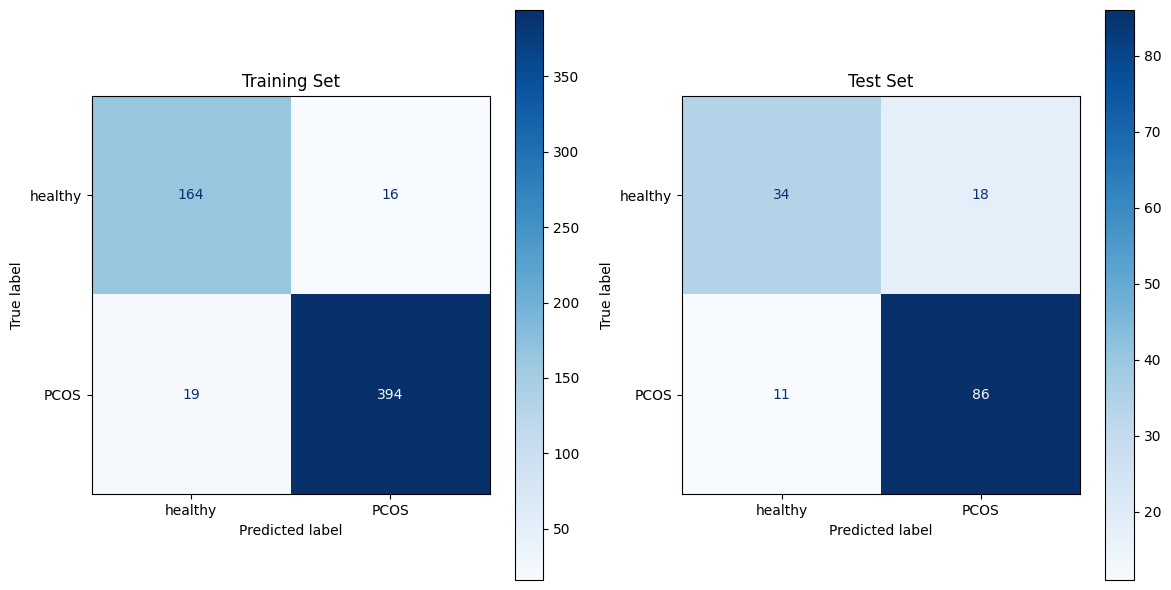

Training set
              precision    recall  f1-score   support

     healthy       0.90      0.91      0.90       180
        PCOS       0.96      0.95      0.96       413

    accuracy                           0.94       593
   macro avg       0.93      0.93      0.93       593
weighted avg       0.94      0.94      0.94       593

Test set
              precision    recall  f1-score   support

     healthy       0.76      0.65      0.70        52
        PCOS       0.83      0.89      0.86        97

    accuracy                           0.81       149
   macro avg       0.79      0.77      0.78       149
weighted avg       0.80      0.81      0.80       149



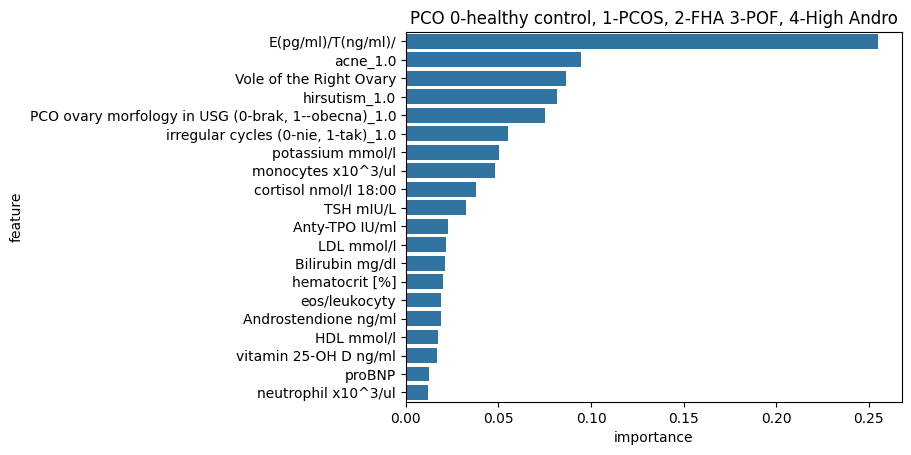

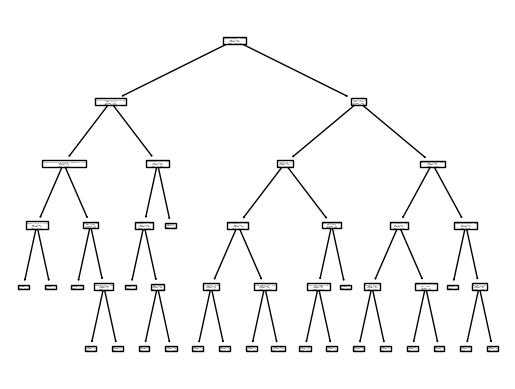

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


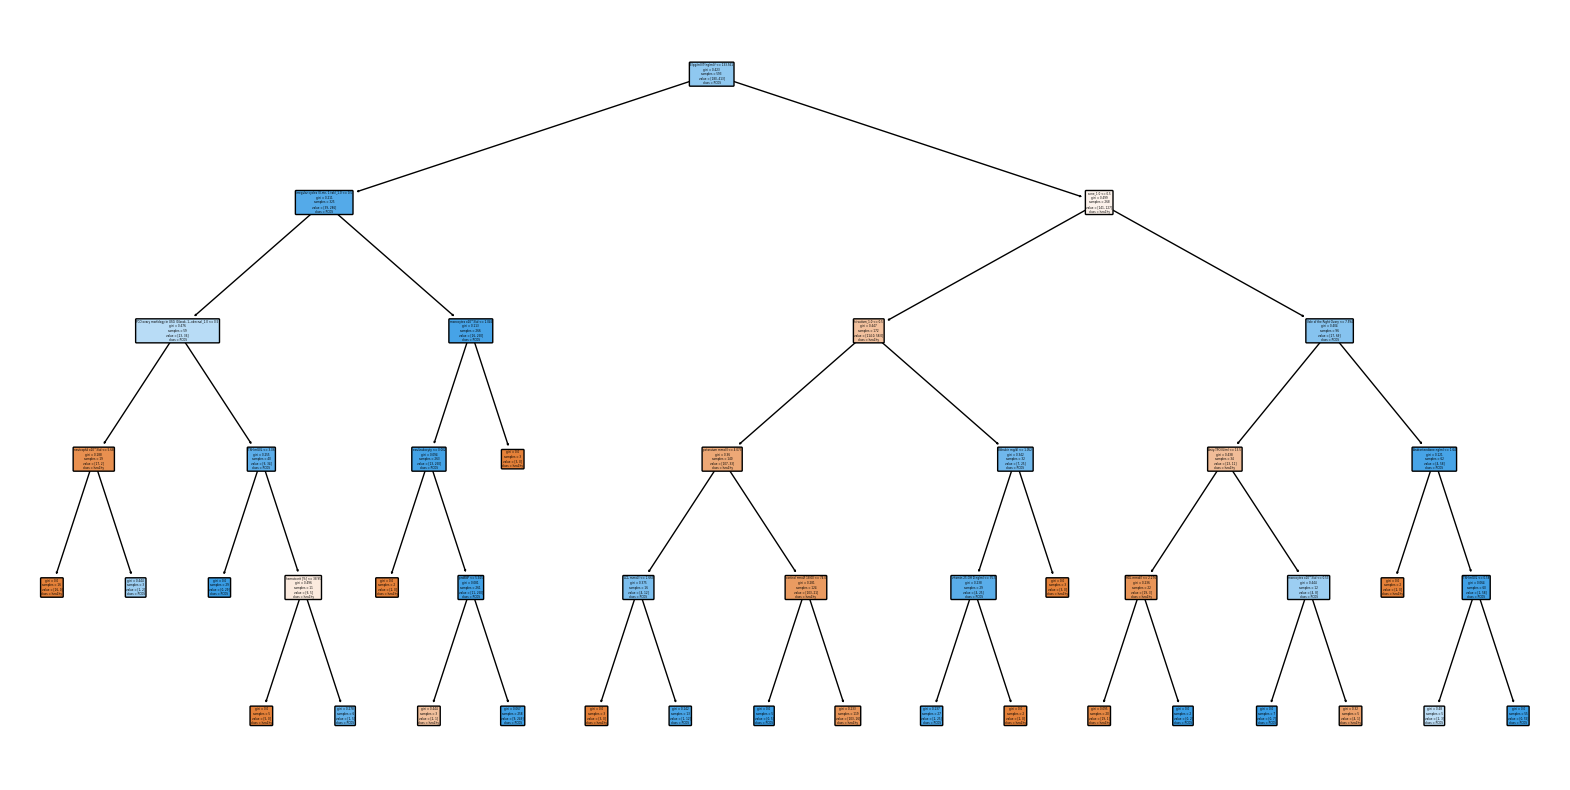

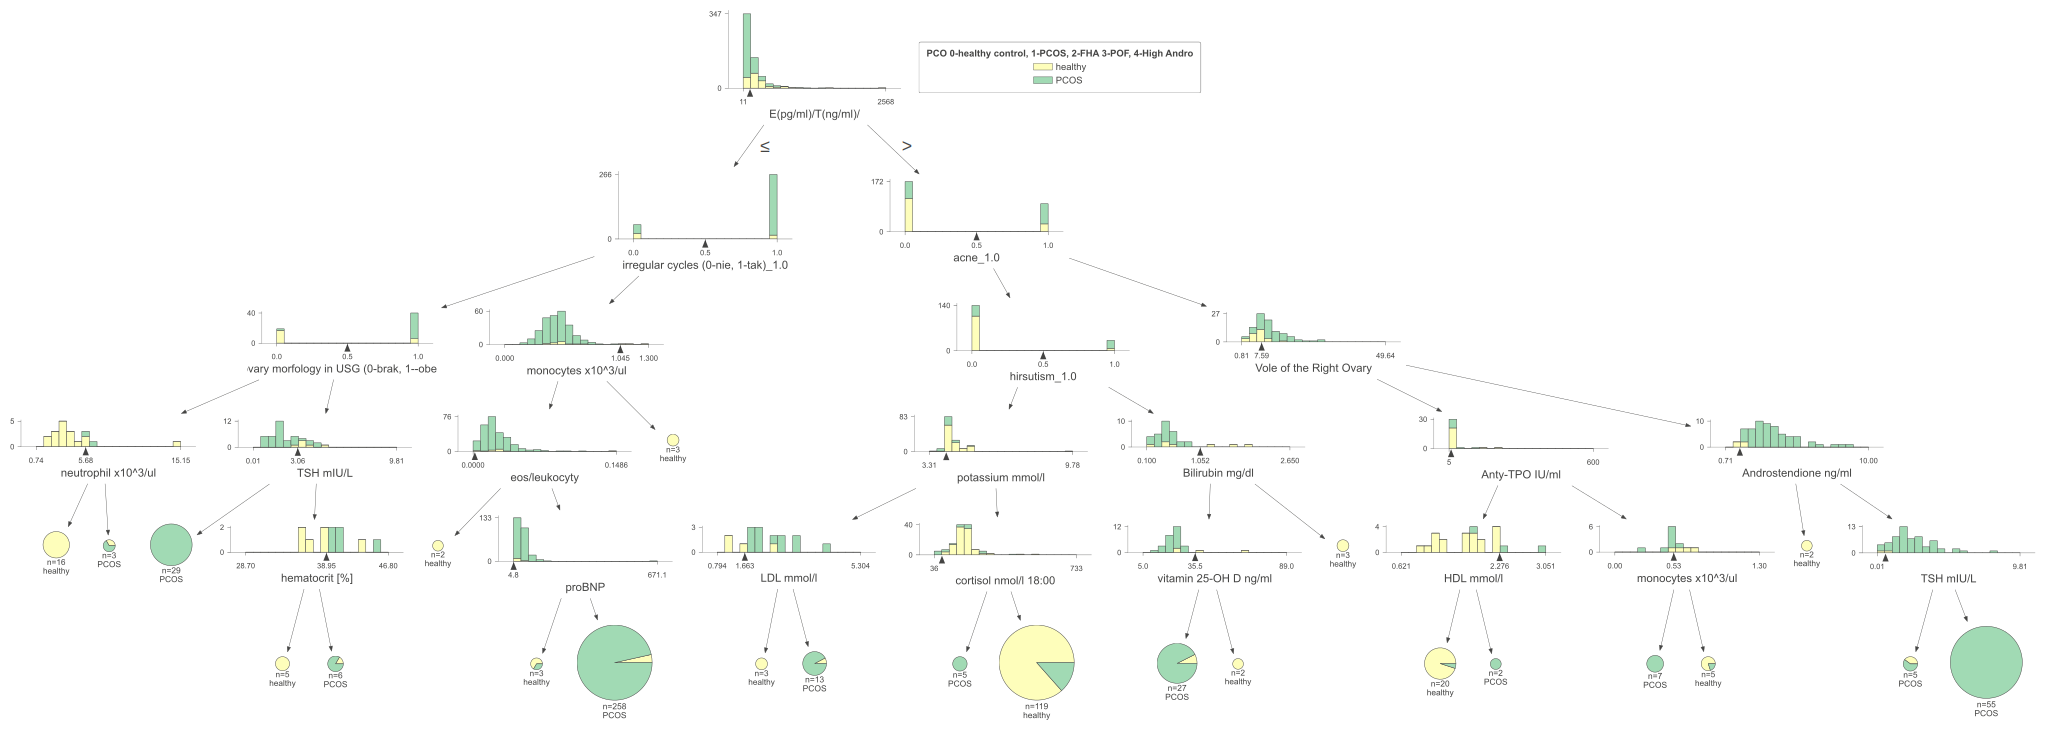

In [29]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=6, class_weight=None, random_state=7)
# {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}	

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

X_transformed = pipeline_tree['preprocessor'].fit_transform(X_train, y_train)
column_names = pipeline_tree['preprocessor'].get_feature_names_out()

plt.figure(figsize=(20,10))
plot_tree(pipeline_tree['model'], filled=True, rounded=True, feature_names=column_names, class_names=CLASS_NAMES)
plt.savefig('charts/trees/PCO_tree.pdf')
plt.show()

viz_model = dtreeviz.model(pipeline_tree['model'],
                        X_train=X_transformed,
                        y_train=y_train.astype(int),
                        feature_names=column_names,
                        target_name=PCO,
                        class_names=CLASS_NAMES,
                        )

viz_model.view(scale=1.8)

### RF

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


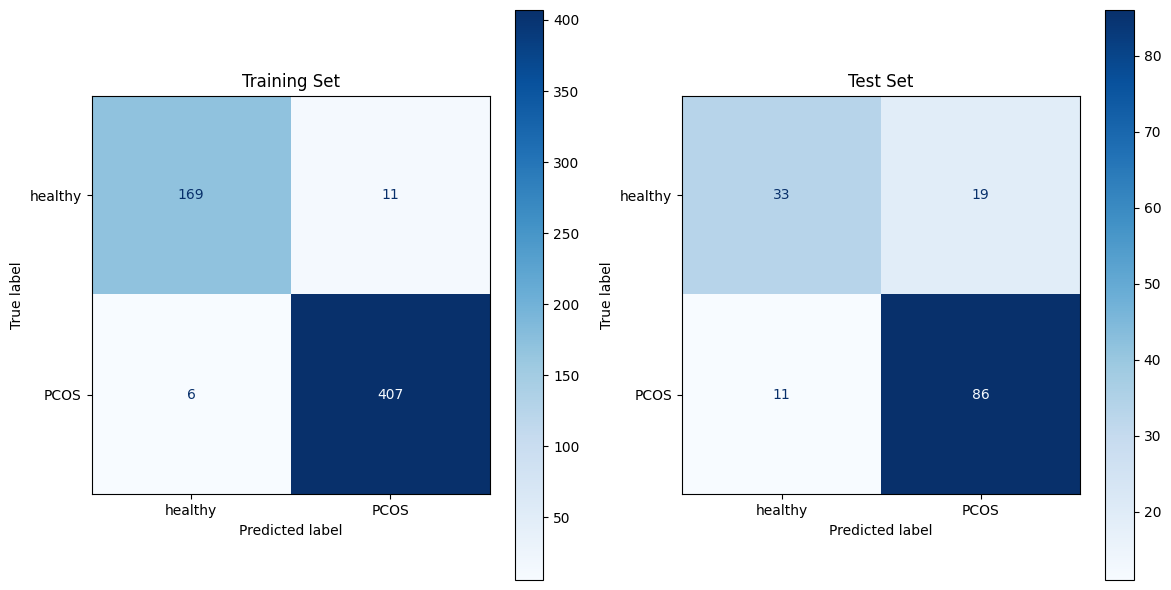

Training set
              precision    recall  f1-score   support

     healthy       0.97      0.94      0.95       180
        PCOS       0.97      0.99      0.98       413

    accuracy                           0.97       593
   macro avg       0.97      0.96      0.97       593
weighted avg       0.97      0.97      0.97       593

Test set
              precision    recall  f1-score   support

     healthy       0.75      0.63      0.69        52
        PCOS       0.82      0.89      0.85        97

    accuracy                           0.80       149
   macro avg       0.78      0.76      0.77       149
weighted avg       0.79      0.80      0.79       149



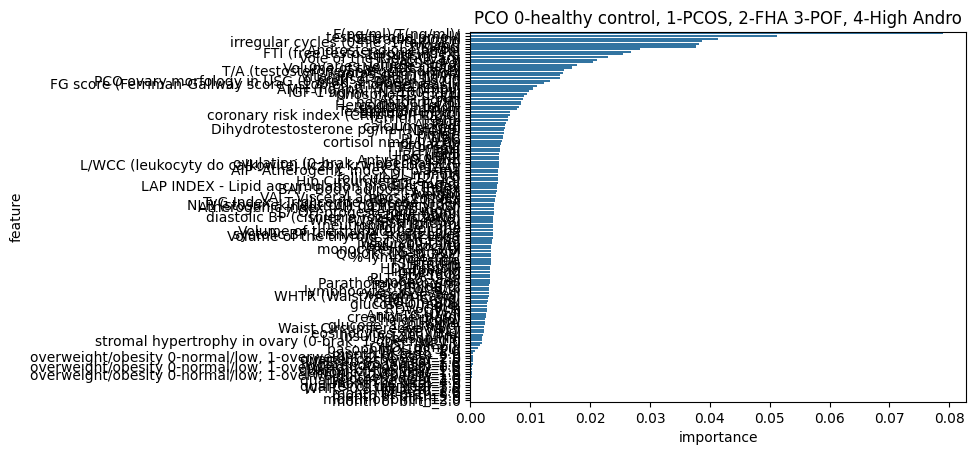

In [31]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


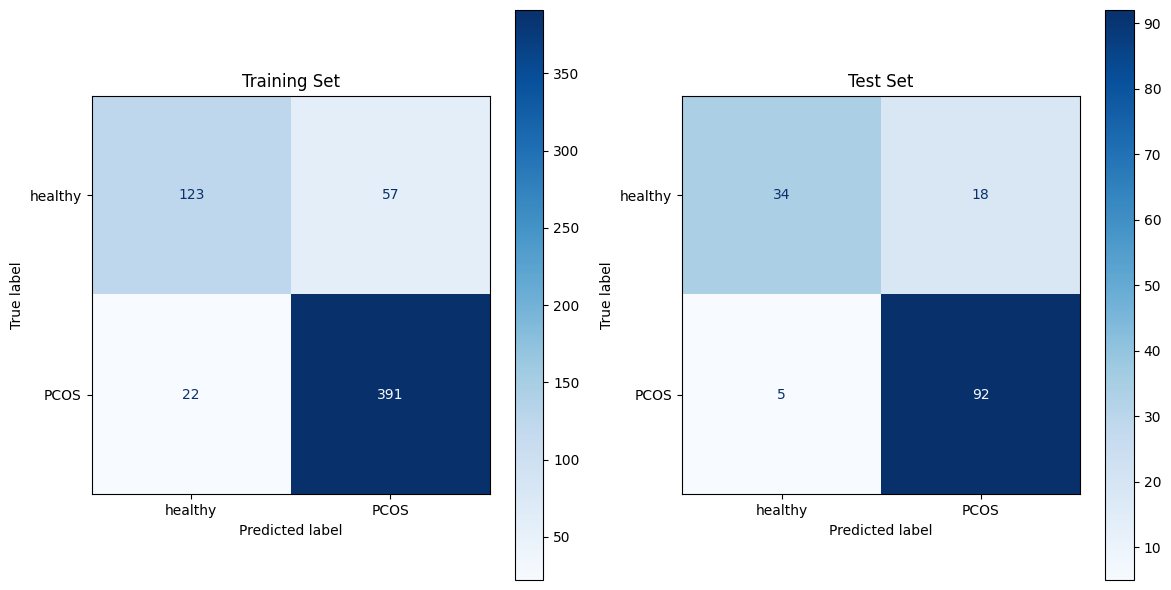

Training set
              precision    recall  f1-score   support

     healthy       0.85      0.68      0.76       180
        PCOS       0.87      0.95      0.91       413

    accuracy                           0.87       593
   macro avg       0.86      0.82      0.83       593
weighted avg       0.87      0.87      0.86       593

Test set
              precision    recall  f1-score   support

     healthy       0.87      0.65      0.75        52
        PCOS       0.84      0.95      0.89        97

    accuracy                           0.85       149
   macro avg       0.85      0.80      0.82       149
weighted avg       0.85      0.85      0.84       149



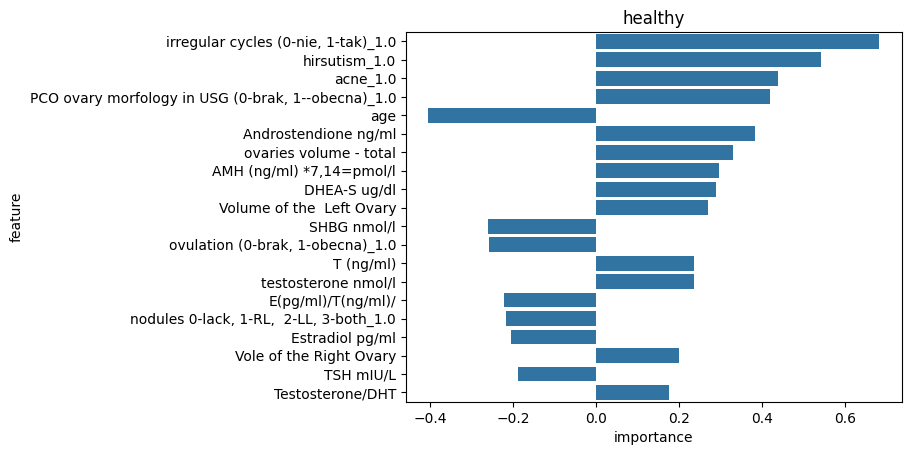

In [35]:
model_lr = LogisticRegression(C=0.1, multi_class='multinomial', max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

# FHA vs healthy

In [36]:
dataset_file_path = 'data/preprocessed_dataset.csv'
df = pd.read_csv(dataset_file_path)
df.sample(5)

 
df.loc[(df[PCO] != 0) & (df[PCO] != 2), PCO] = np.nan

#  change all 2s to 1s for the need of the visualisation algorithm
df[PCO] = np.where(df[PCO] == 2, 1, df[PCO])

CLASS_NAMES = ['healthy', 'FHA']

df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [2, 3, 4],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}
Best score (f1_weighted): 0.7478773049480797


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


params  mean_train_score  mean_test_score
0   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}          0.865951         0.747877
2   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}          0.866920         0.747832
1   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}          0.866632         0.744371
8   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.858836         0.741460
24  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.927696         0.741142
6   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.858836         0.739372
7   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.858836         0.739309
26  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.927687         0.738907
5   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.860707         0.738558
3   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.860707         0.737472
4   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.861047         0.737423
18  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}          0.951389         0.737134
22  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.939312         0.731322
16  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.901976         0.730182
25  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.927960         0.727270
23  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.939026         0.726973
15  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.901956         0.726530
19  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}          0.950028         0.726108
17  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.901976         0.725919
21  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.939885         0.724221
12  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.909326         0.723536
13  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 1}
Best score (f1_weighted): 0.7623292342087826


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


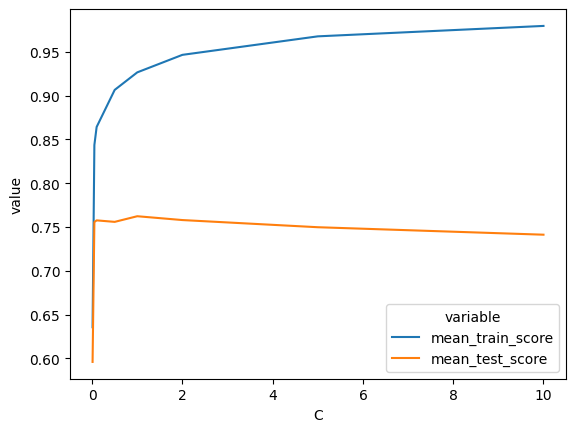

C  mean_train_score  mean_test_score
0  0.01          0.635667         0.596074
1  0.05          0.843607         0.755658
2   0.1          0.864177         0.757599
3   0.5          0.906481         0.755891
4     1          0.926494         0.762329
5     2          0.946482         0.757960
6     5          0.967596         0.749783
7    10          0.979495         0.741260

In [38]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

C=0.05

In [39]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}
Best score (f1_weighted): 0.82374749201541


params  mean_train_score  mean_test_score
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.984764         0.823747
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.985327         0.823208
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.993079         0.816994
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.994188         0.814843
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.990585         0.813824
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.982547         0.807532
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.992804         0.807110
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.990308         0.800648
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.989475         0.799704

In [ ]:
# model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

# param_grid_svc = {
#     'model__kernel': ['linear', 'rbf', 'sigmoid'],
#     'model__C': [0.1, 1, 10, 100],
#     'model__gamma': [0.1, 1, 10],
#     'model__epsilon': [0.1, 0.2, 0.3],
# }

# svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
# svc_h_scores.sort_values(by='mean_test_score', ascending=False)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


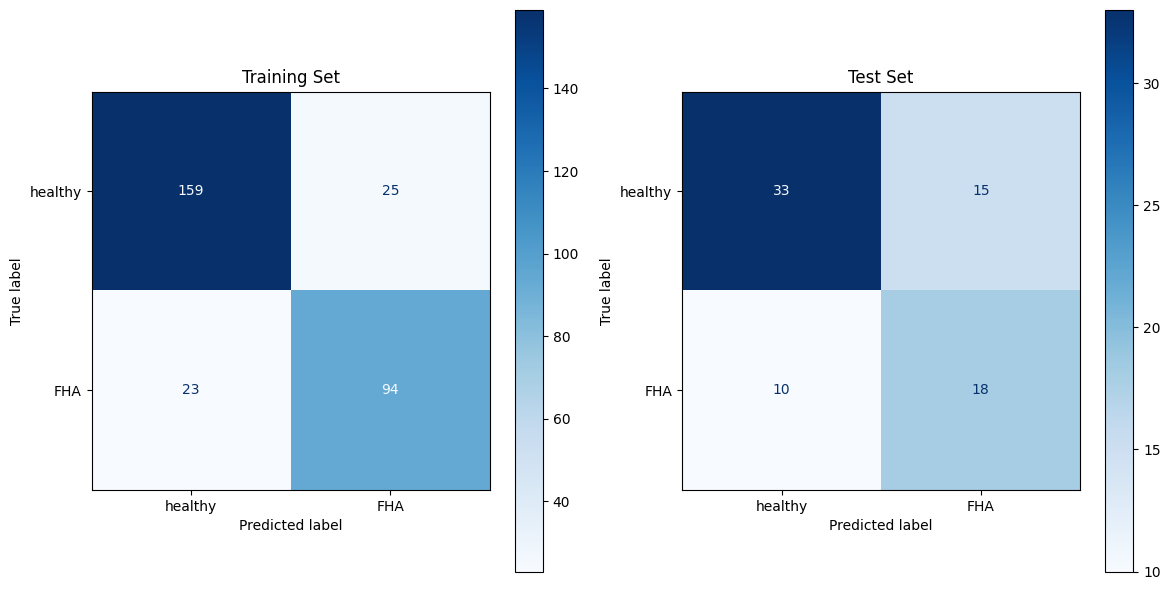

Training set
              precision    recall  f1-score   support

     healthy       0.87      0.86      0.87       184
         FHA       0.79      0.80      0.80       117

    accuracy                           0.84       301
   macro avg       0.83      0.83      0.83       301
weighted avg       0.84      0.84      0.84       301

Test set
              precision    recall  f1-score   support

     healthy       0.77      0.69      0.73        48
         FHA       0.55      0.64      0.59        28

    accuracy                           0.67        76
   macro avg       0.66      0.67      0.66        76
weighted avg       0.69      0.67      0.68        76



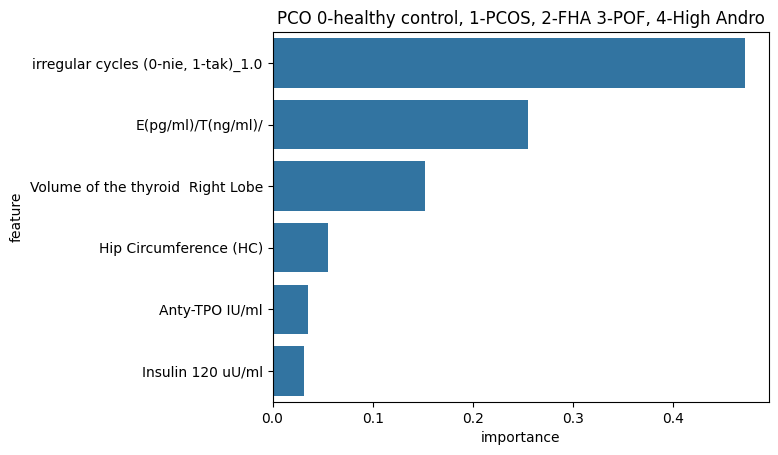

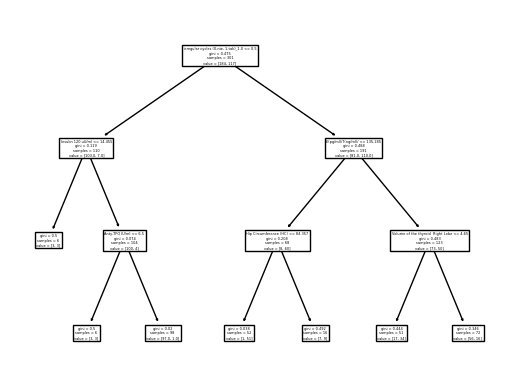

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


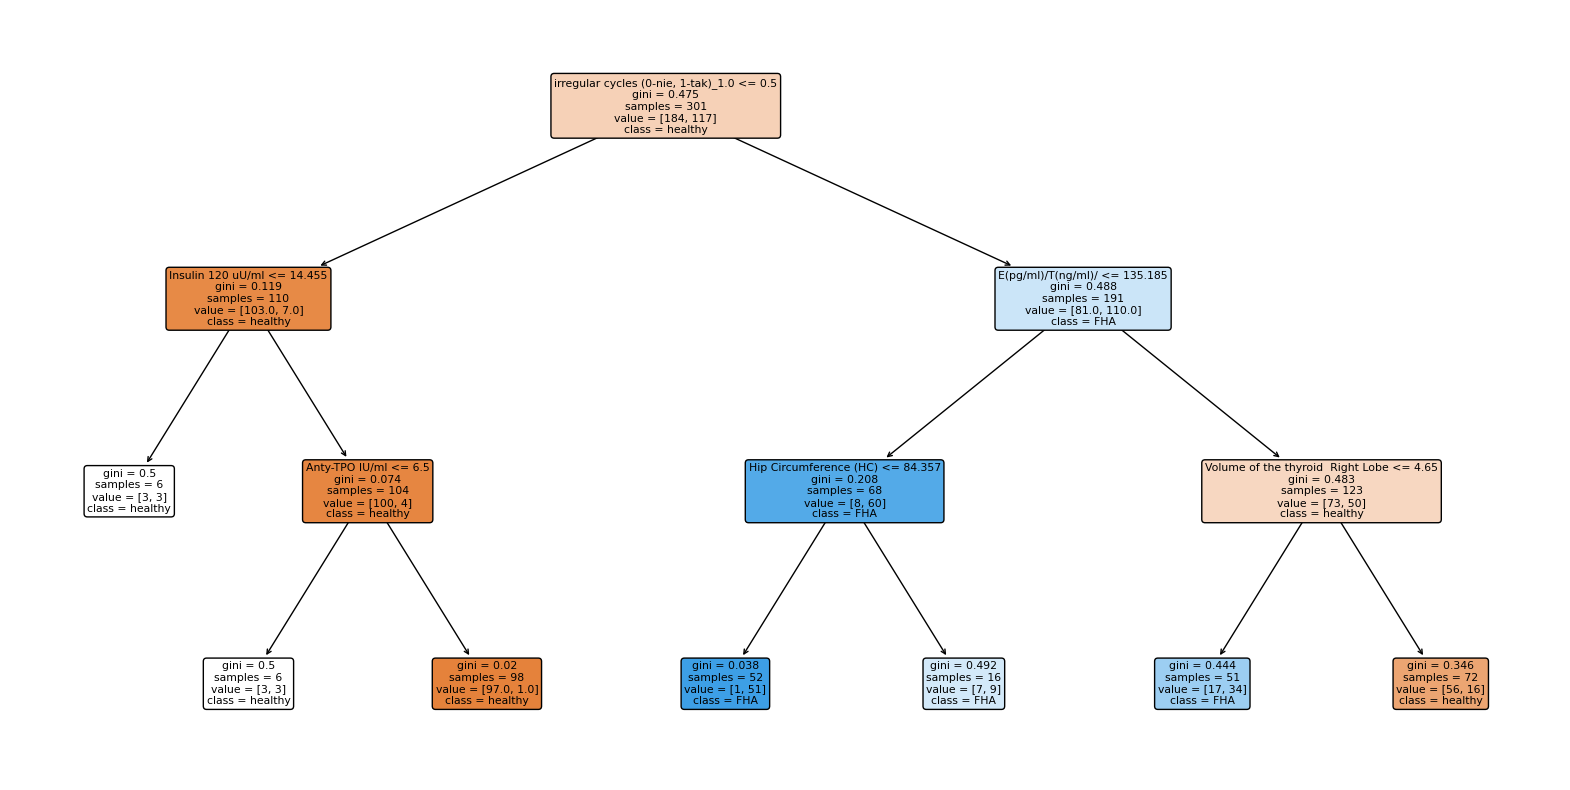

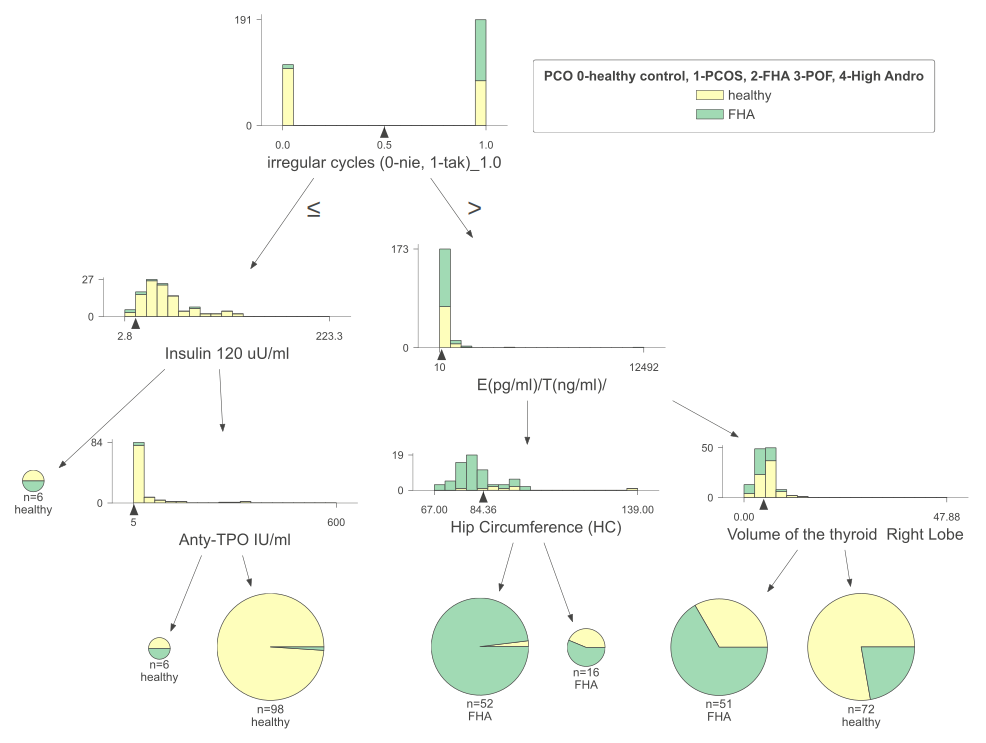

In [40]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=6, class_weight=None, random_state=7)
# {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}	
feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

X_transformed = pipeline_tree['preprocessor'].fit_transform(X_train, y_train)
column_names = pipeline_tree['preprocessor'].get_feature_names_out()

plt.figure(figsize=(20,10))
plot_tree(pipeline_tree['model'], filled=True, rounded=True, feature_names=column_names, class_names=CLASS_NAMES)
plt.savefig('charts/trees/PCO_tree.pdf')
plt.show()

viz_model = dtreeviz.model(pipeline_tree['model'],
                        X_train=X_transformed,
                        y_train=y_train.astype(int),
                        feature_names=column_names,
                        target_name=PCO,
                        class_names=CLASS_NAMES,
                        )

viz_model.view(scale=1.8)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


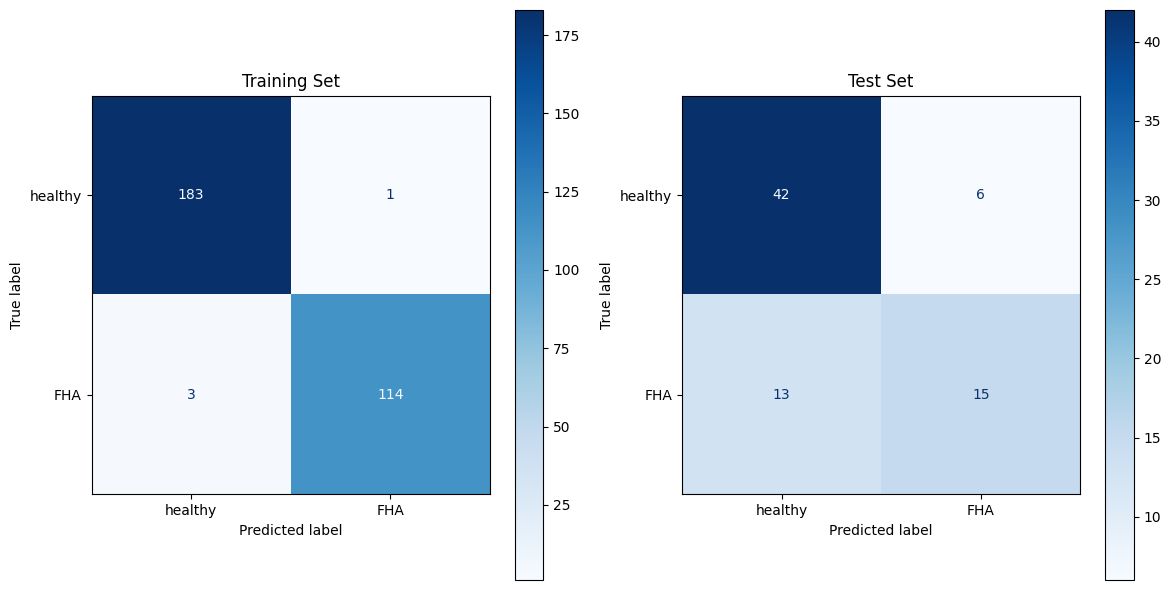

Training set
              precision    recall  f1-score   support

     healthy       0.98      0.99      0.99       184
         FHA       0.99      0.97      0.98       117

    accuracy                           0.99       301
   macro avg       0.99      0.98      0.99       301
weighted avg       0.99      0.99      0.99       301

Test set
              precision    recall  f1-score   support

     healthy       0.76      0.88      0.82        48
         FHA       0.71      0.54      0.61        28

    accuracy                           0.75        76
   macro avg       0.74      0.71      0.71        76
weighted avg       0.75      0.75      0.74        76



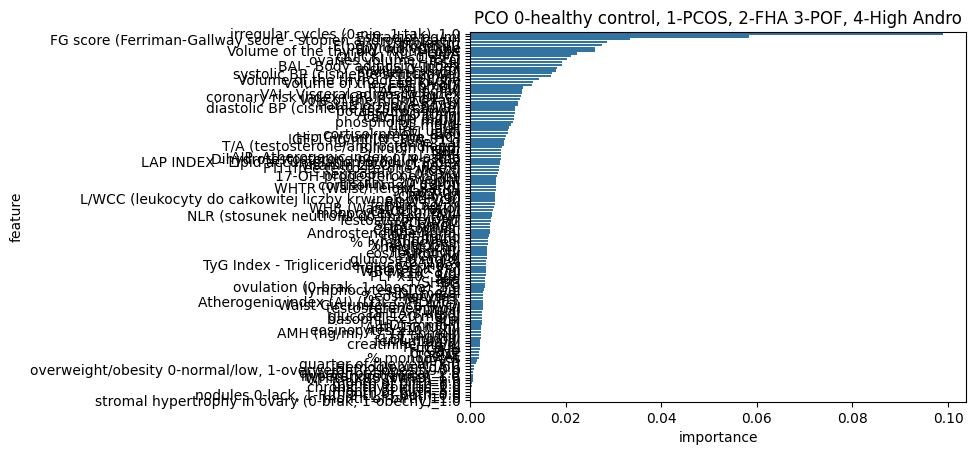

In [43]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


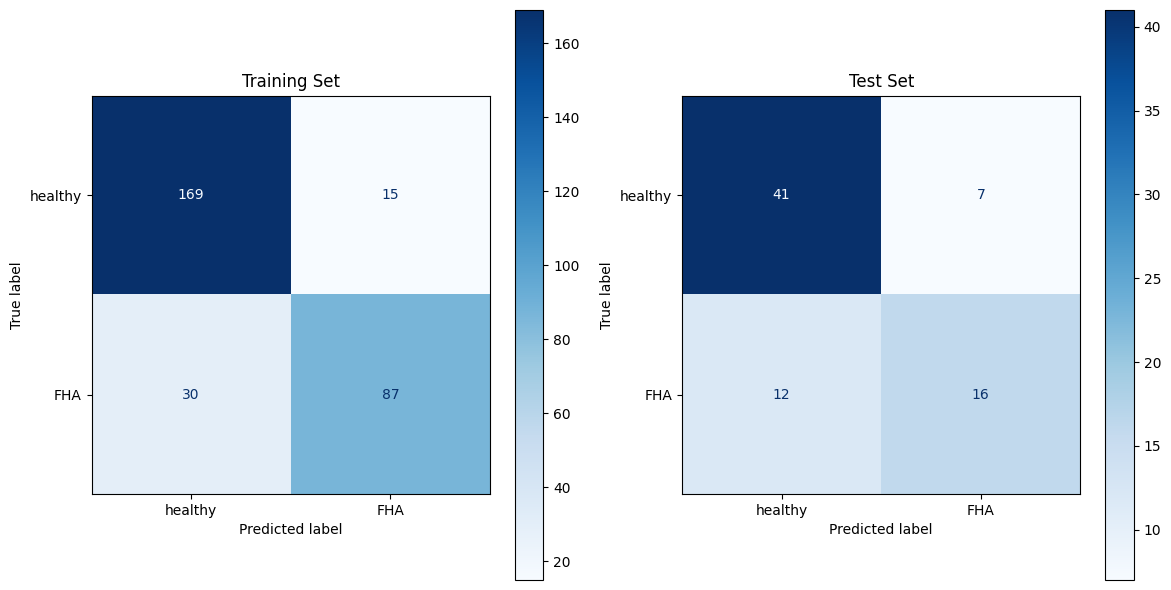

Training set
              precision    recall  f1-score   support

     healthy       0.85      0.92      0.88       184
         FHA       0.85      0.74      0.79       117

    accuracy                           0.85       301
   macro avg       0.85      0.83      0.84       301
weighted avg       0.85      0.85      0.85       301

Test set
              precision    recall  f1-score   support

     healthy       0.77      0.85      0.81        48
         FHA       0.70      0.57      0.63        28

    accuracy                           0.75        76
   macro avg       0.73      0.71      0.72        76
weighted avg       0.74      0.75      0.74        76



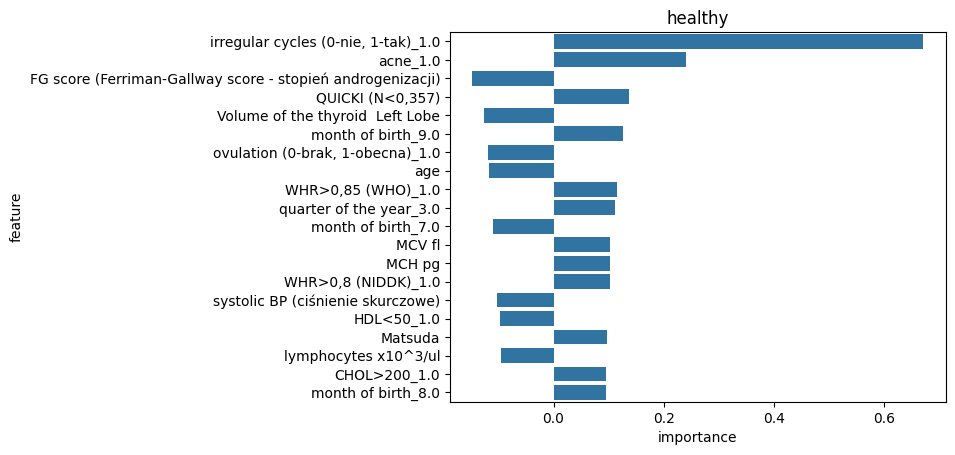

In [42]:
model_lr = LogisticRegression(C=0.05, multi_class='multinomial', max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

# High Andro vs healthy

In [44]:
dataset_file_path = 'data/preprocessed_dataset.csv'
df = pd.read_csv(dataset_file_path)

df.loc[(df[PCO] != 0) & (df[PCO] != 4), PCO] = np.nan

#  change all 4s to 1s for the need of the visualisation algorithm
df[PCO] = np.where(df[PCO] == 4, 1, df[PCO])

CLASS_NAMES = ['healthy', 'High Andro']

df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [2, 3, 4],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}
Best score (f1_weighted): 0.753558184282484


params  mean_train_score  mean_test_score
7   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.883589         0.753558
16  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.919113         0.749811
2   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}          0.890281         0.749616
6   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.883589         0.749094
1   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}          0.890281         0.747436
5   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.888746         0.746671
8   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.883589         0.743896
26  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.933823         0.743708
13  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.929065         0.743142
9   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}          0.938314         0.741379
25  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.935556         0.740803
23  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.948613         0.740781
4   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.888746         0.739632
15  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.919004         0.738167
3   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.888746         0.737565
0   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}          0.890281         0.737452
14  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.928816         0.736490
22  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.950189         0.736221
17  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.918917         0.736170
10  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}          0.937898         0.733306
18  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4}          0.959821         0.731797
21  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 1}
Best score (f1_weighted): 0.8051008092132818


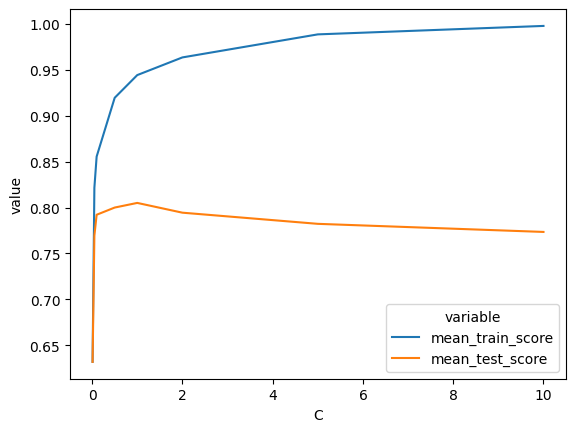

C  mean_train_score  mean_test_score
0  0.01          0.631861         0.631779
1  0.05          0.821635         0.769388
2   0.1          0.855601         0.792189
3   0.5          0.919691         0.800042
4     1          0.944443         0.805101
5     2          0.963699         0.794458
6     5          0.988813         0.782296
7    10          0.998030         0.773474

In [46]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

C=0.1

In [47]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (f1_weighted): 0.818980364280087


params  mean_train_score  mean_test_score
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.975478         0.818980
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.982974         0.816000
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.989185         0.811901
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.973178         0.811488
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.981674         0.811338
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.988856         0.810192
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.974525         0.810120
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.981024         0.808406
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.986892         0.802834

In [ ]:
# model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

# param_grid_svc = {
#     'model__kernel': ['linear', 'rbf', 'sigmoid'],
#     'model__C': [0.1, 1, 10, 100],
#     'model__gamma': [0.1, 1, 10],
#     'model__epsilon': [0.1, 0.2, 0.3],
# }

# svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
# svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

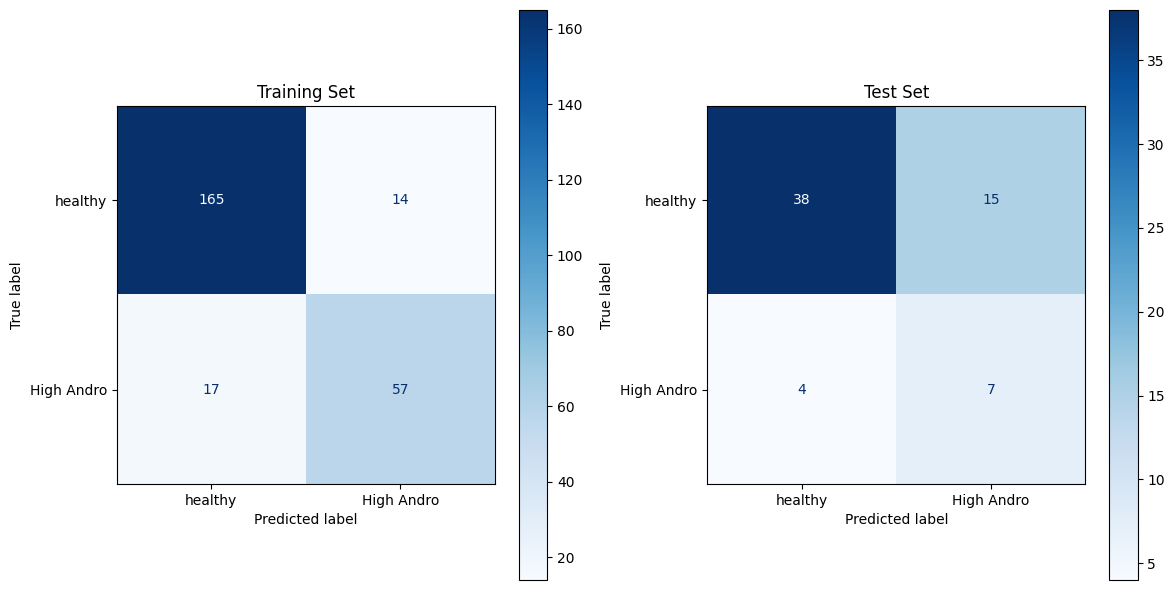

Training set
              precision    recall  f1-score   support

     healthy       0.91      0.92      0.91       179
  High Andro       0.80      0.77      0.79        74

    accuracy                           0.88       253
   macro avg       0.85      0.85      0.85       253
weighted avg       0.88      0.88      0.88       253

Test set
              precision    recall  f1-score   support

     healthy       0.90      0.72      0.80        53
  High Andro       0.32      0.64      0.42        11

    accuracy                           0.70        64
   macro avg       0.61      0.68      0.61        64
weighted avg       0.80      0.70      0.74        64



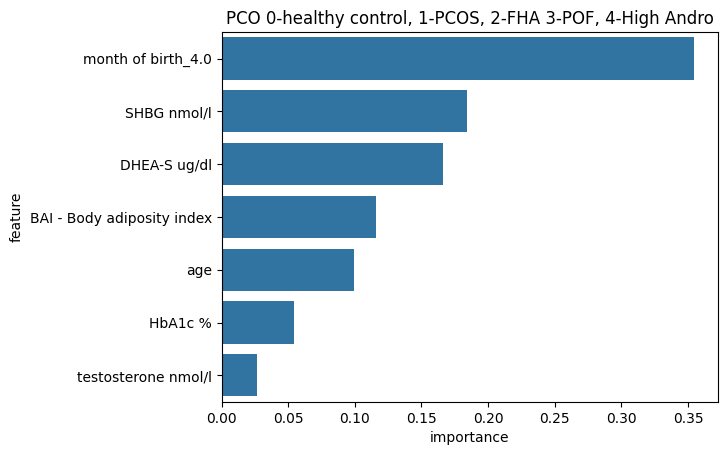

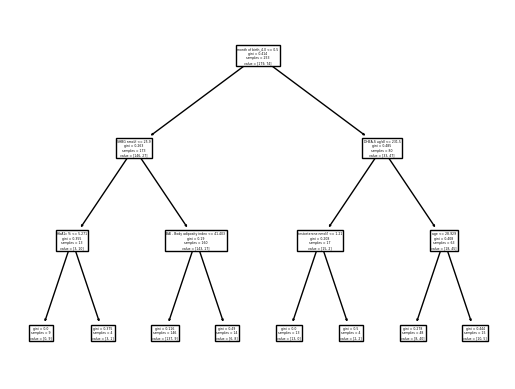

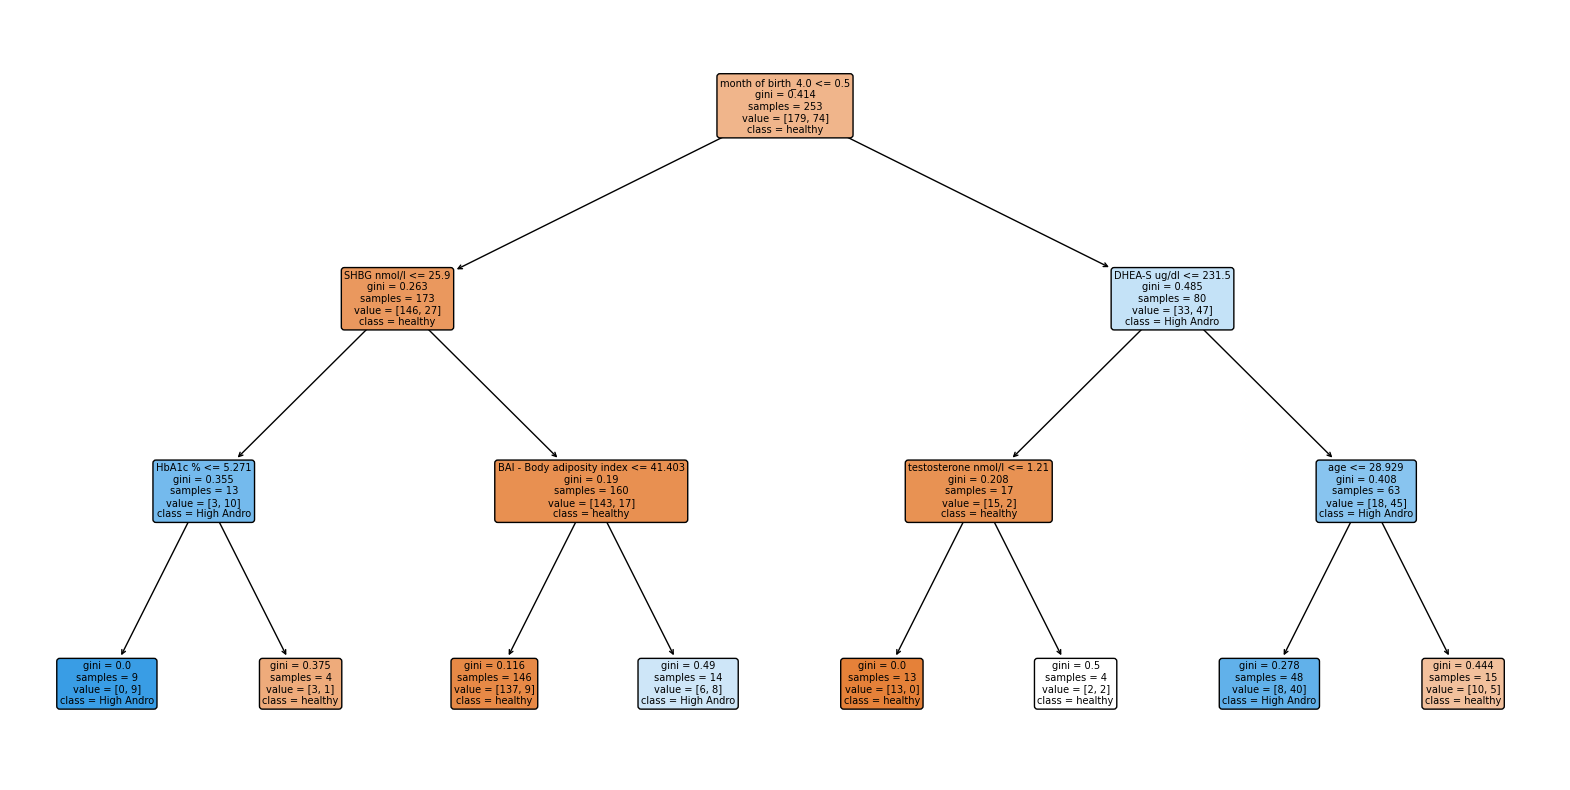

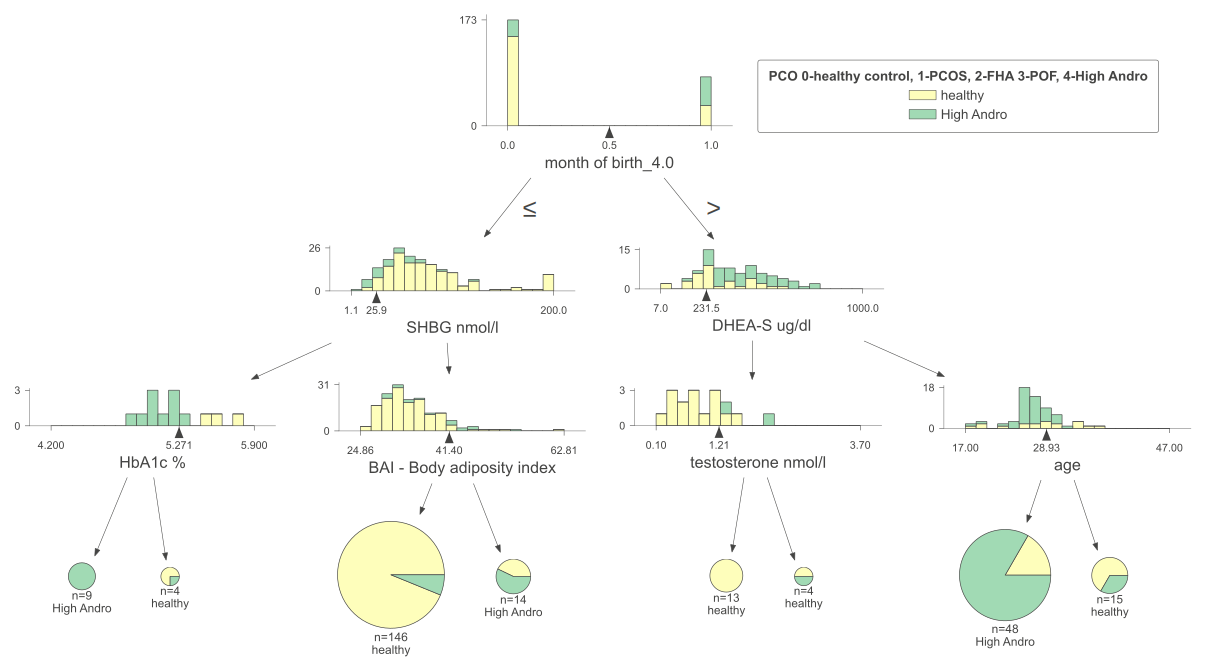

In [51]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=5, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

X_transformed = pipeline_tree['preprocessor'].fit_transform(X_train, y_train)
column_names = pipeline_tree['preprocessor'].get_feature_names_out()

plt.figure(figsize=(20,10))
plot_tree(pipeline_tree['model'], filled=True, rounded=True, feature_names=column_names, class_names=CLASS_NAMES)
plt.savefig('charts/trees/PCO_tree.pdf')
plt.show()

viz_model = dtreeviz.model(pipeline_tree['model'],
                        X_train=X_transformed,
                        y_train=y_train.astype(int),
                        feature_names=column_names,
                        target_name=PCO,
                        class_names=CLASS_NAMES,
                        )

viz_model.view(scale=1.8)

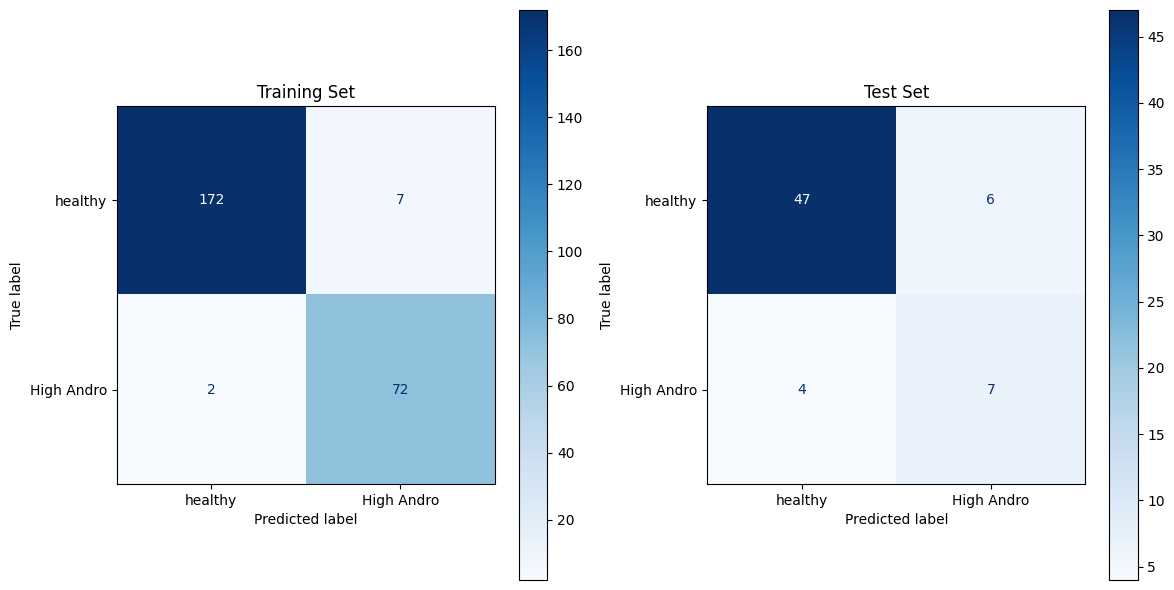

Training set
              precision    recall  f1-score   support

     healthy       0.99      0.96      0.97       179
  High Andro       0.91      0.97      0.94        74

    accuracy                           0.96       253
   macro avg       0.95      0.97      0.96       253
weighted avg       0.97      0.96      0.96       253

Test set
              precision    recall  f1-score   support

     healthy       0.92      0.89      0.90        53
  High Andro       0.54      0.64      0.58        11

    accuracy                           0.84        64
   macro avg       0.73      0.76      0.74        64
weighted avg       0.86      0.84      0.85        64



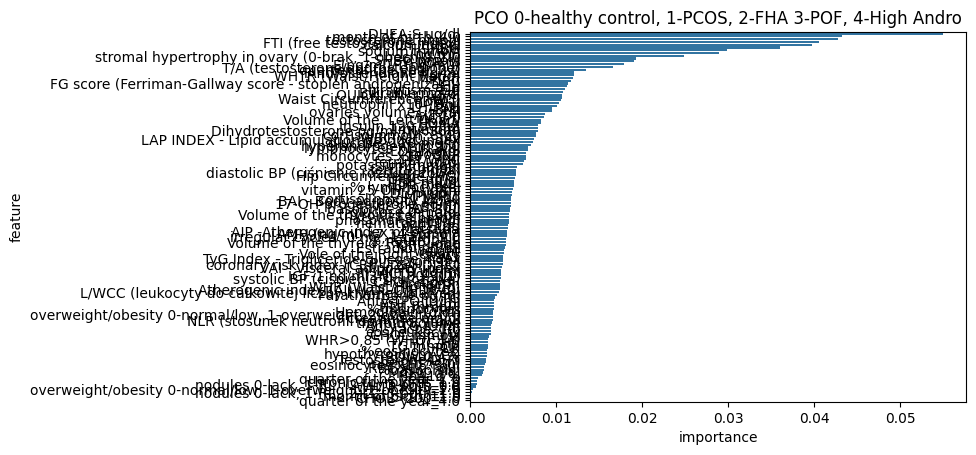

In [50]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

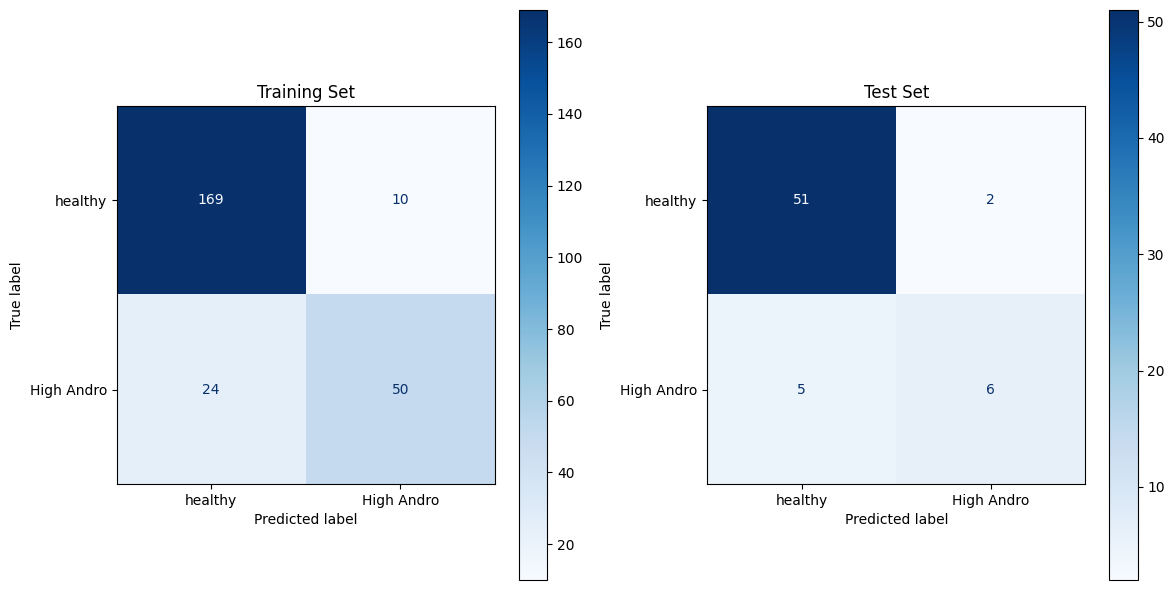

Training set
              precision    recall  f1-score   support

     healthy       0.88      0.94      0.91       179
  High Andro       0.83      0.68      0.75        74

    accuracy                           0.87       253
   macro avg       0.85      0.81      0.83       253
weighted avg       0.86      0.87      0.86       253

Test set
              precision    recall  f1-score   support

     healthy       0.91      0.96      0.94        53
  High Andro       0.75      0.55      0.63        11

    accuracy                           0.89        64
   macro avg       0.83      0.75      0.78        64
weighted avg       0.88      0.89      0.88        64



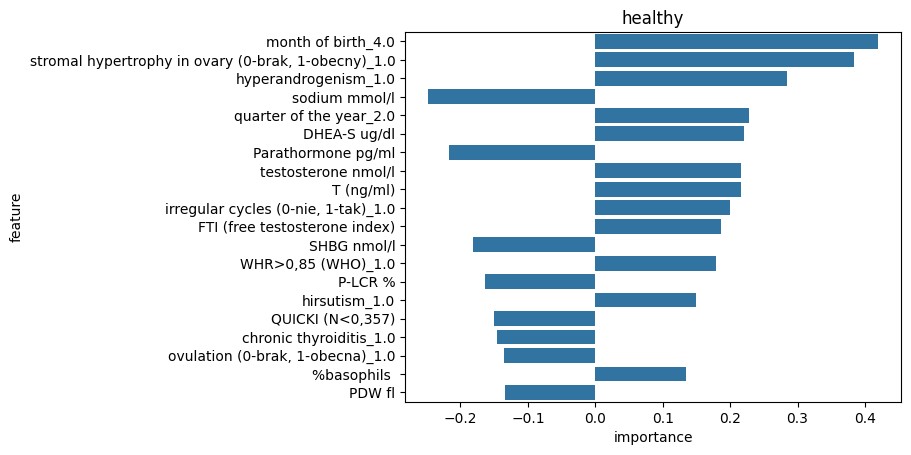

In [48]:

model_lr = LogisticRegression(C=0.1, multi_class='multinomial', max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

THe rest--------------------

### Remaining

In [46]:
model = DecisionTreeClassifier()

pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])

param_grid = {
    'model__max_depth': [3, 4, 5, 7, 9, 12],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__class_weight': ['balanced', None]
}

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score (f1_weighted):", best_score)

Best parameters: {'model__class_weight': None, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5}
Best score (f1_weighted): 0.7401518887732567


Not balanced
F1 Scores: [0.75851426 0.73212494 0.72404687 0.7253572  0.76647734 0.69018314
 0.76612538 0.74403181 0.70841317 0.73530162 0.72001816 0.73804945
 0.74321216 0.75013194 0.7423934 ], 
Mean F1: 0.736292054817271


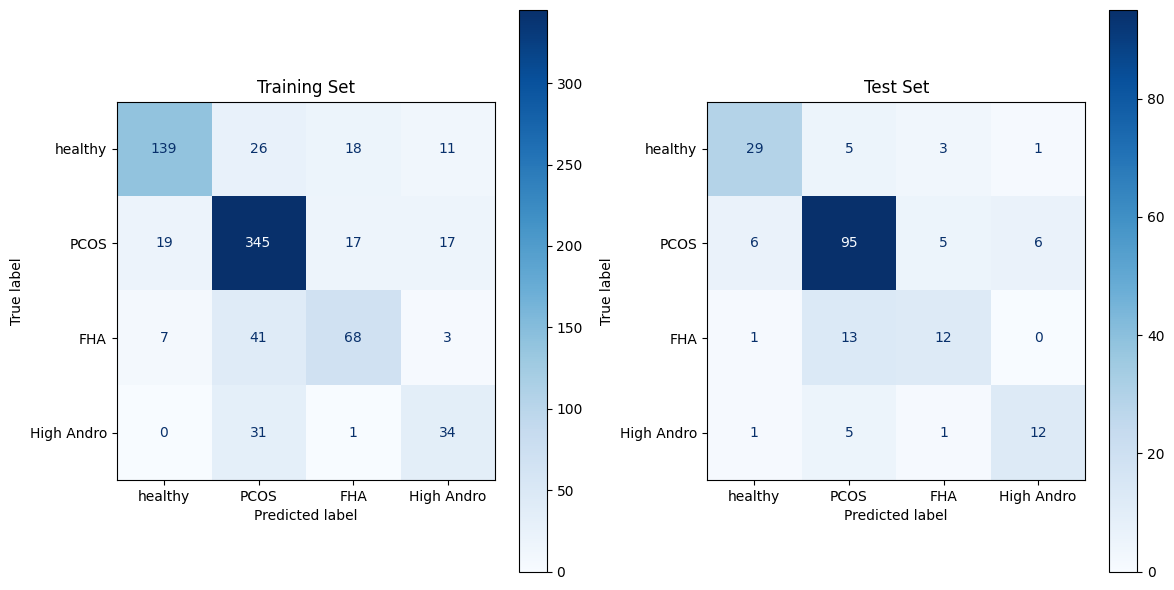

In [49]:
continuous_preprocessor = Pipeline([('imputer', KNNImputer(n_neighbors=9))])
categorical_preprocessor = Pipeline([('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))])

preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    remainder='passthrough',
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])


print('Not balanced')
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5, class_weight=None)

pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
#  not sure about the call below - it will probably not work
validate_model_classification(pipeline, preprocessor, X_train, y_train, X_test, y_test)

#### Balanced

F1 Scores: [0.74485283 0.76099339 0.71500126 0.72967718 0.74945908 0.73525168
 0.75782815 0.73779784 0.68071017 0.72467532 0.72830237 0.70531558
 0.7534498  0.74299615 0.73120646], 
Mean F1: 0.7331678187251502


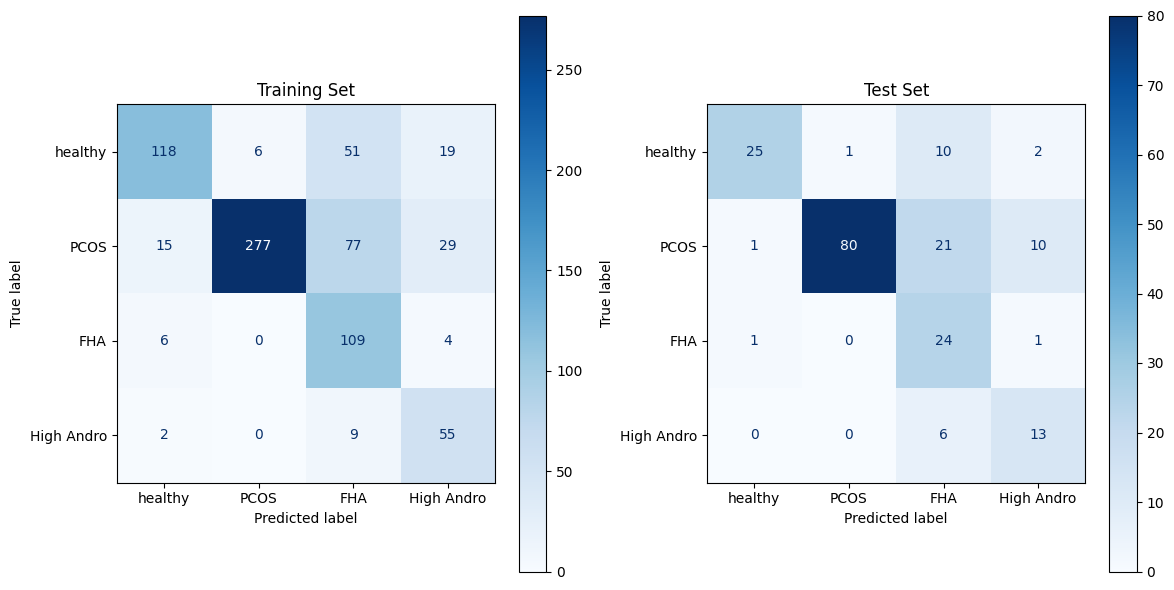

In [101]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5, class_weight='balanced')
pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
#  not sure about the call below - it will probably not work

validate_model_classification(pipeline, preprocessor, X_train, y_train, X_test, y_test)

F1 Scores: [0.69558537 0.64734085 0.63151441 0.63634765 0.7110475  0.65301517
 0.67848605 0.61612657 0.58674638 0.61960512 0.66471048 0.64659646
 0.6519676  0.67110714 0.61844587], 
Mean F1: 0.648576174833835


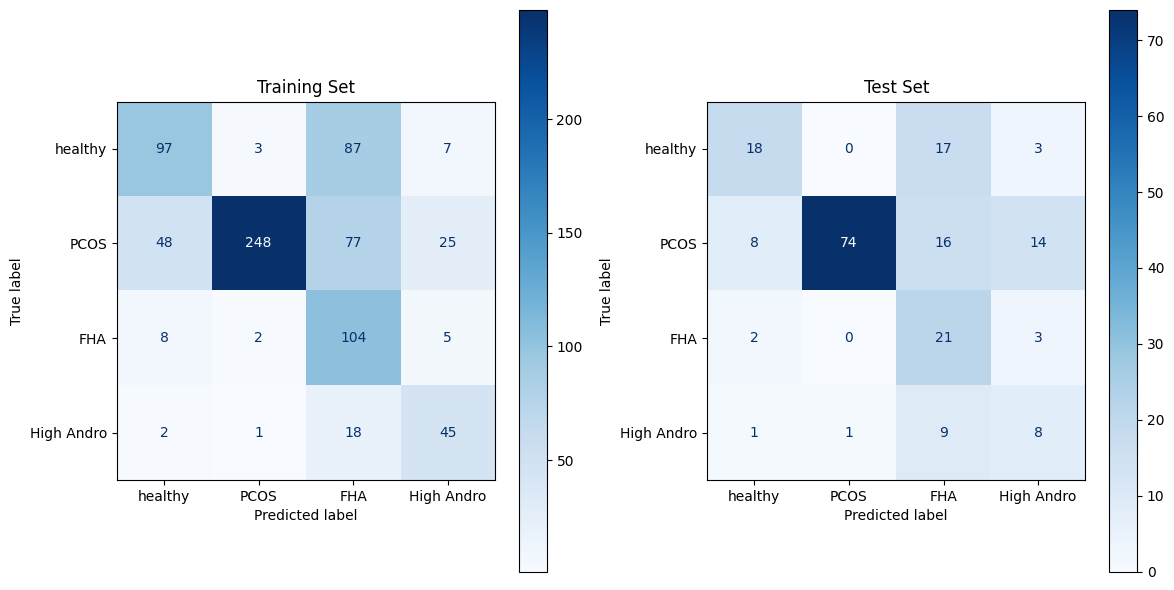

In [88]:
continuous_preprocessor = Pipeline([('imputer', KNNImputer(n_neighbors=9))])
categorical_preprocessor = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])
# categorical_preprocessor = Pipeline([('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])
#  NOTE: Drzewo działa dużo lepiej kiedy nie zastępujemy brakujących wartości

preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    remainder='passthrough',
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5, class_weight='balanced')


pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
#  not sure about the call below - it will probably not work

validate_model_classification(pipeline, preprocessor, X_train, y_train, X_test, y_test)

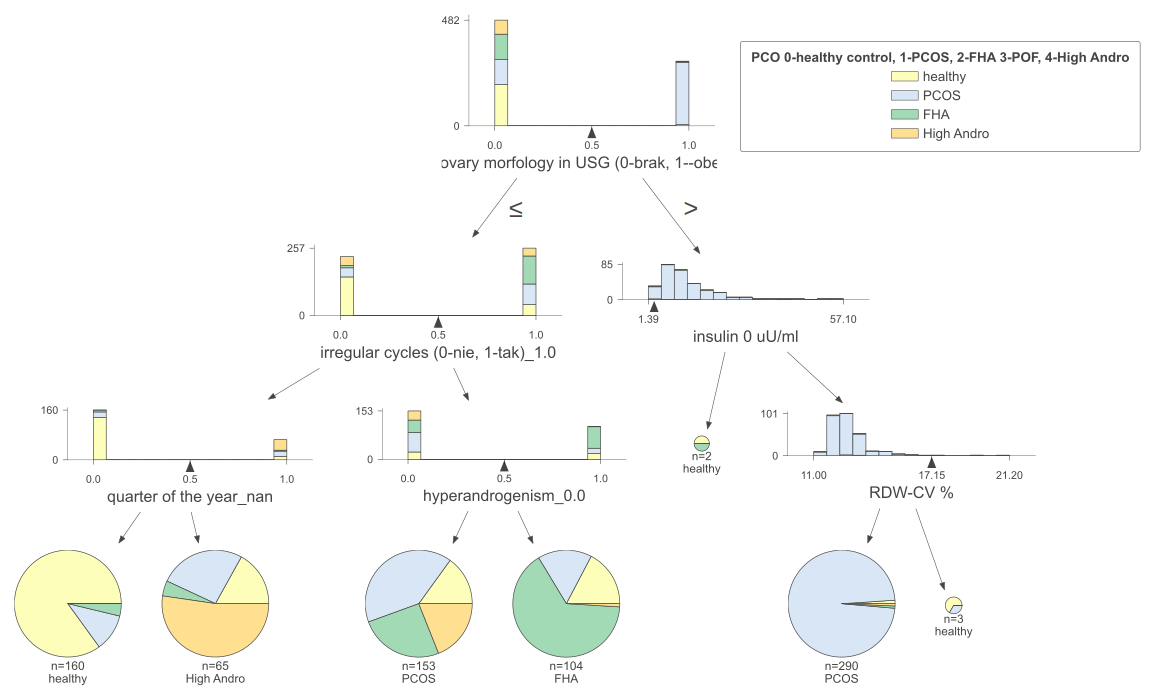

In [98]:
continuous_preprocessor = Pipeline([('imputer', KNNImputer(n_neighbors=9))])
categorical_preprocessor = Pipeline([('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))])

preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    remainder='passthrough',
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5, class_weight=None)

pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])

pipeline.fit(X_train, y_train)
X_transformed = preprocessor.fit_transform(X_train, y_train)
column_names = pipeline['preprocessor'].get_feature_names_out()


viz_model = dtreeviz.model(model,
                           X_train=X_transformed, y_train=y_train.astype(int),
                           feature_names=column_names,
                           target_name=PCO,
                           class_names=CLASS_NAMES,
                           )

viz_model.view(scale=1.8)

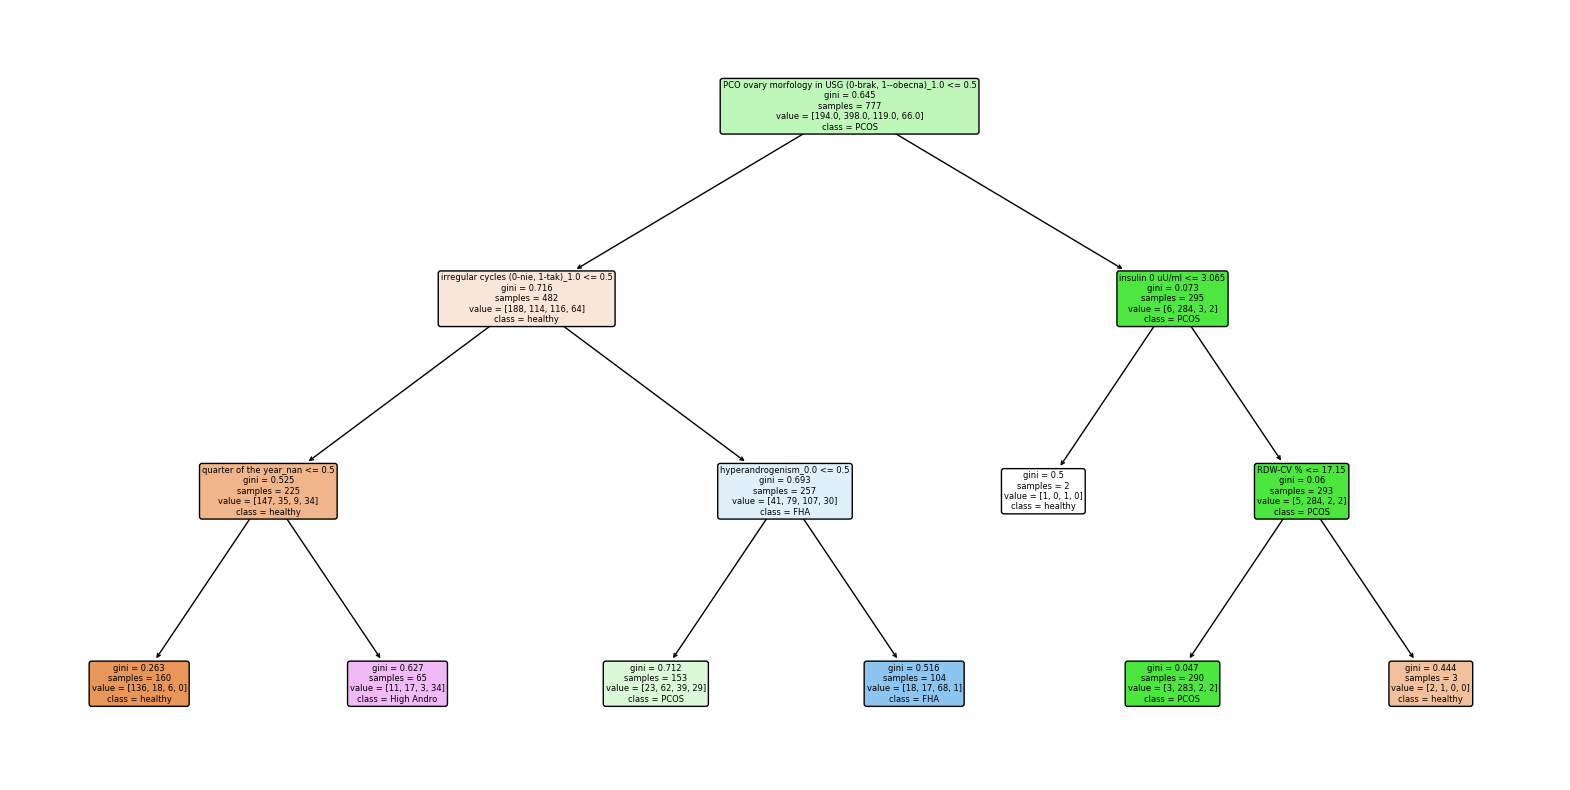

In [99]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, rounded=True, feature_names=column_names, class_names=CLASS_NAMES)
plt.savefig('charts/trees/PCO_tree.pdf')
plt.show()

## Feature importances


## Feature selection methods

In [93]:
selector = VarianceThreshold(threshold=0.001)
selector.set_output(transform='pandas')
selector.fit_transform(X_train)

kept_features_mask = selector.get_support()

print("Usunięte cechy:", [X_train.columns[i] for i, keep in enumerate(kept_features_mask) if not keep])

Usunięte cechy: ['basophils x10^3/ul', 'NRBC x10^3/ul', 'MPV/PLT', 'eos/leukocyty', 'Testosterone/DHT']


### SelectKBest

In [94]:

from sklearn.feature_selection import f_classif


def feature_selection(feature_selection_model, X_train, y_train):
    preprocessor = ColumnTransformer(
        verbose_feature_names_out=False,
        transformers=[
            ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
            ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
        ])
    pipeline = Pipeline([('preprocessor', preprocessor), ('feature_selection', feature_selection_model)])

    X_new = pipeline.fit_transform(X_train, y_train)

    selected_indices = feature_selection_model.get_support(indices=True)
    selected_feature_names = [preprocessor.get_feature_names_out()[i] for i in selected_indices]
    print(selected_feature_names)

    return pd.DataFrame(X_new, columns=selected_feature_names)


feature_selection(SelectKBest(f_classif, k=10), X_train, y_train).head()

['ovaries volume - total', 'irregular cycles (0-nie, 1-tak)_1.0', 'ovulation (0-brak, 1-obecna)_0.0', 'PCO ovary morfology in USG (0-brak, 1--obecna)_0.0', 'PCO ovary morfology in USG (0-brak, 1--obecna)_1.0', 'PCO ovary morfology in USG (0-brak, 1--obecna)_nan', 'nodules 0-lack, 1-RL,  2-LL, 3-both_nan', 'chronic thyroiditis_nan', 'follicules >12_1.0', 'quarter of the year_nan']


ovaries volume - total  irregular cycles (0-nie, 1-tak)_1.0  ovulation (0-brak, 1-obecna)_0.0  PCO ovary morfology in USG (0-brak, 1--obecna)_0.0  PCO ovary morfology in USG (0-brak, 1--obecna)_1.0  PCO ovary morfology in USG (0-brak, 1--obecna)_nan  nodules 0-lack, 1-RL,  2-LL, 3-both_nan  chronic thyroiditis_nan  follicules >12_1.0  quarter of the year_nan
0                9.666800                                  1.0                               0.0                                                 0.0                                                 0.0                                                 1.0                                      1.0                      1.0                 0.0                      1.0
1               18.290000                                  1.0                               0.0                                                 0.0                                                 1.0                                                 0.0                                      0.0                      0.0                 0.0                      0.0
2                8.150000                                  1.0                               1.0                                                 1.0                                                 0.0                                                 0.0                                      0.0                      0.0                 0.0                      0.0
3               17.371722                                  1.0                               0.0                                                 1.0                                                 0.0                                                 0.0                                      0.0                      0.0                 0.0                      0.0
4               27.980000                                  1.0                               1.0                                                 0.0                                                 1.0                                                 0.0                                      0.0                      0.0                 1.0                      0.0

### Recursive feature elimination

Optimal number of features: 3
['irregular cycles (0-nie, 1-tak)_1.0'
 'PCO ovary morfology in USG (0-brak, 1--obecna)_1.0'
 'nodules 0-lack, 1-RL,  2-LL, 3-both_nan']


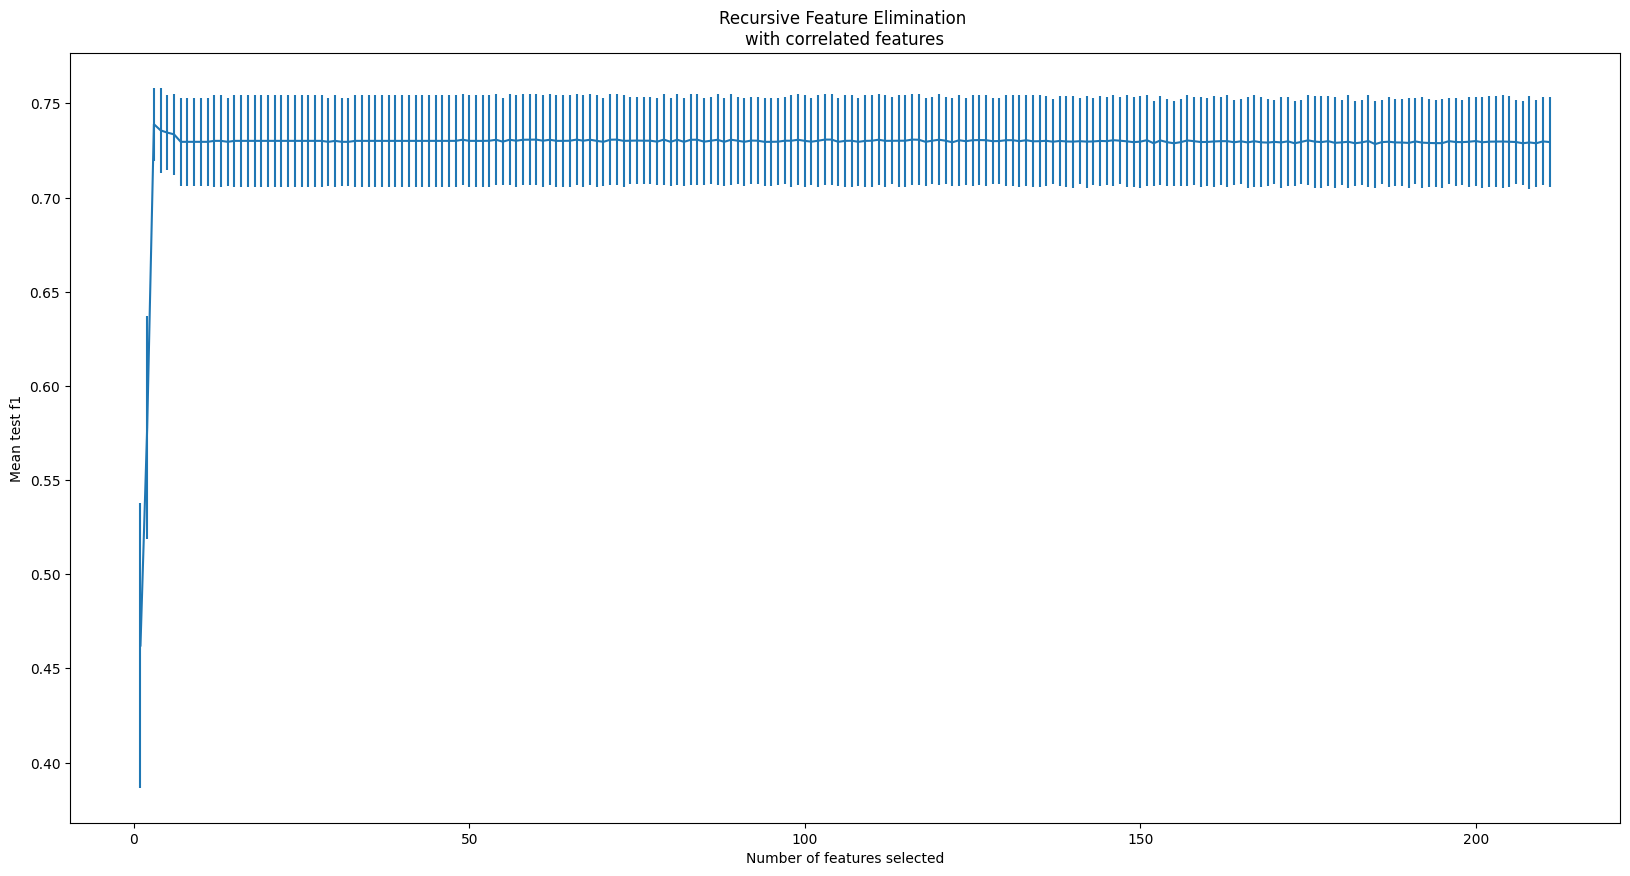

In [95]:
min_features_to_select = 1
cv = RepeatedKFold(n_repeats=5, n_splits=5, random_state=42)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring="f1_weighted",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)

pipeline = Pipeline([('preprocessor', preprocessor), ('fs', rfecv)])
pipeline.fit(X_train, y_train)

selected_feature_indices = rfecv.get_support(indices=True)
selected_feature_names = preprocessor.get_feature_names_out()[selected_feature_indices]

# print(len(preprocessor.get_feature_names_out()))
print(f"Optimal number of features: {rfecv.n_features_}")
# print(rfecv.get_feature_names_out())
print(selected_feature_names)

n_scores = len(rfecv.cv_results_["mean_test_score"])
scores = abs(rfecv.cv_results_["mean_test_score"])

plt.figure(figsize=(20,10))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test f1")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    scores,
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

### SelectFromModel

In [96]:
cv = RepeatedKFold(n_repeats=5, n_splits=5, random_state=42)
sel_from_model = SelectFromModel(
    estimator=model,
)

pipeline = Pipeline([('preprocessor', preprocessor), ('sel_from_model', sel_from_model)])
pipeline.fit(X_train, y_train)

selected_feature_indices = sel_from_model.get_support(indices=True)
selected_feature_names = preprocessor.get_feature_names_out()[selected_feature_indices]
selected_feature_names

array(['weight', 'height (cm)', 'FTI (free testosterone index)',
       'irregular cycles (0-nie, 1-tak)_1.0',
       'PCO ovary morfology in USG (0-brak, 1--obecna)_1.0',
       'hypothyroidism_nan', 'nodules 0-lack, 1-RL,  2-LL, 3-both_nan'],
      dtype=object)

### Permutation importance

In [97]:
pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)

result = permutation_importance(pipeline, X_train, y_train, n_repeats=5, random_state=42, n_jobs=-1, scoring='f1_weighted')
importances = result.importances_mean

feature_importances = dict(zip(preprocessor.get_feature_names_out(), importances))

sorted_importances = sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=True)

df_importances = pd.DataFrame(sorted_importances, columns=['feature', 'importance'])

df_importances.head(15)

feature  importance
0                                            neutrophil x10^3/ul    0.294271
1                                         ovaries volume - total    0.117194
2                                                    RBC x10^6ul    0.067505
3   overweight/obesity 0-normal/low, 1-overweight, 2-obesity_0.0    0.017257
4                                                         weight    0.005064
5                                                 % lymphocytes     0.003560
6                                                      WC>88_nan    0.002171
7                                                    height (cm)    0.001458
8                                               Hypertension_0.0    0.000490
9                                                Bilirubin mg/dl    0.000179
10                                                    LDL mmol/l    0.000133
11                                                        PDW fl    0.000113
12                                                 eos/leukocyty    0.000113
13                                                     TG mmol/l    0.000113
14                                               insulin 0 uU/ml    0.000113